In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### LOADING THE DATASET

In [2]:
#Loading the dataset
data=pd.read_csv("US_Accidents_March23.csv")

In [3]:
# Display the first five rows
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
# Get a summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
#rows and columns 
data.shape

(7728394, 46)

# About the dataset
The dataset shows different measurments that has been taken from car crashes in USA over the periode 2016 to 2023.
This can be used to predict how much traffic was hindered by a crash.

This dataset has 46 columns and has a size of 3GB.
The dataset consists of 7 million rows. 

# Target
The target is the feature "severity" (The level of impact the accident had on the traffic, 1 indicates the least amount of impact)

## Limiting the dataset
The dataset is quite large.

The dataset should be limited to a smaller selection, that is representative of the whole dataset.

We can use stratified for getting a representative selection. Stratified sampling keeps the targets distribution when splitting that dataset,

We will limit the dataset to 200.000 rows.

In [7]:
target='Severity'

In [8]:
from sklearn.model_selection import train_test_split
_, df = train_test_split(data, test_size=2000000, stratify=data[target], random_state=42)

Now we can see that the sample has the same distribution of the target, as the original dataset.

In [9]:
def print_distribution_of_target(dataset):
    target_counts = dataset[target].value_counts()
    total_samples = len(dataset)

    for value, count in target_counts.items():
        percentage = (count / total_samples) * 100
        print(f"{value}: {percentage:.2f}%")
        
print("data")
print_distribution_of_target(data)

print("data sample")
print_distribution_of_target(df)

data
2: 79.67%
3: 16.81%
4: 2.65%
1: 0.87%
data sample
2: 79.67%
3: 16.81%
4: 2.65%
1: 0.87%


In [10]:
df.shape

(2000000, 46)

In [11]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.000000e+06,2.000000e+06,2.000000e+06,1.119460e+06,1.119460e+06,2.000000e+06,1.957568e+06,1.483213e+06,1.954894e+06,1.963624e+06,1.954211e+06,1.852524e+06,1.430287e+06
mean,2.212384e+00,3.620221e+01,-9.469698e+01,3.626236e+01,-9.573518e+01,5.615433e-01,6.166317e+01,5.825297e+01,6.482211e+01,2.953928e+01,9.089989e+00,7.687686e+00,8.346220e-03
std,4.875317e-01,5.072818e+00,1.739211e+01,5.270310e+00,1.810971e+01,1.735084e+00,1.901918e+01,2.239017e+01,2.282523e+01,1.005172e+00,2.690558e+00,5.366953e+00,1.029380e-01
min,1.000000e+00,2.455740e+01,-1.245481e+02,2.457011e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.340556e+01,-1.172177e+02,3.346195e+01,-1.177522e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582716e+01,-8.777380e+01,3.618803e+01,-8.803935e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008538e+01,-8.035258e+01,4.018178e+01,-8.024605e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900076e+01,-6.760688e+01,4.900076e+01,-6.762660e+01,1.625000e+02,1.960000e+02,1.960000e+02,1.000000e+02,5.863000e+01,1.400000e+02,8.228000e+02,1.040000e+01


In [12]:
object_cols = df.select_dtypes(include=['object']).columns

df[object_cols] = df[object_cols].astype('category')

df["Description"] = df["Description"].astype('string')

datetime_feature_names = ["Start_Time", "End_Time", "Weather_Timestamp"]
for feature_name in datetime_feature_names:
    df[feature_name] = pd.to_datetime(df[feature_name], format='%Y-%m-%d %H:%M:%S', errors='coerce')

datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()
cat_cols = df.select_dtypes(include=['category']).columns.tolist()
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()
num_cols = df.select_dtypes(include=['float', 'int']).columns.tolist()
string_cols = df.select_dtypes(include=['string']).columns.tolist()

In [13]:
print(f"Datetime cols:{datetime_cols}")
print(f"cat cols:{cat_cols}")
print(f"bool cols:{bool_cols}")
print(f"Numeric cols:{num_cols}")
print(f"String cols: {string_cols}")

Datetime cols:['Start_Time', 'End_Time', 'Weather_Timestamp']
cat cols:['ID', 'Source', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
bool cols:['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
Numeric cols:['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
String cols: ['Description']


### Conclusions
- The date features for dates need to be split up. One feature for the date, and one feature for the time.
- The minute and second for the time features can be cut out. I think it's better to convert the this hour feature to rather be a category for what time of the day it is: early-morning, mid-day, or late night.
- The descriptions can be handled using vectorization like TF-IDF.
- I can handle the categories and boolean values by using one-hot encoding.

### Checking missing values

In [14]:
# to check missing values
df.isnull().sum().sort_values(ascending=False)

End_Lng                  880540
End_Lat                  880540
Precipitation(in)        569713
Wind_Chill(F)            516787
Start_Time               192592
End_Time                 192592
Wind_Speed(mph)          147476
Visibility(mi)            45789
Wind_Direction            45217
Humidity(%)               45106
Weather_Condition         44802
Temperature(F)            42432
Pressure(in)              36376
Weather_Timestamp         31113
Sunrise_Sunset             5887
Civil_Twilight             5887
Nautical_Twilight          5887
Astronomical_Twilight      5887
Airport_Code               5796
Street                     2836
Timezone                   2026
Zipcode                     504
City                         64
Description                   1
Railway                       0
Severity                      0
Start_Lat                     0
Start_Lng                     0
Turning_Loop                  0
Traffic_Signal                0
Traffic_Calming               0
Stop    

In [15]:
# check missing values by percentage
missing_percentage = df.isnull().sum().sort_values(ascending=False)/len(df)*100
missing_percentage

End_Lng                  44.02700
End_Lat                  44.02700
Precipitation(in)        28.48565
Wind_Chill(F)            25.83935
Start_Time                9.62960
End_Time                  9.62960
Wind_Speed(mph)           7.37380
Visibility(mi)            2.28945
Wind_Direction            2.26085
Humidity(%)               2.25530
Weather_Condition         2.24010
Temperature(F)            2.12160
Pressure(in)              1.81880
Weather_Timestamp         1.55565
Sunrise_Sunset            0.29435
Civil_Twilight            0.29435
Nautical_Twilight         0.29435
Astronomical_Twilight     0.29435
Airport_Code              0.28980
Street                    0.14180
Timezone                  0.10130
Zipcode                   0.02520
City                      0.00320
Description               0.00005
Railway                   0.00000
Severity                  0.00000
Start_Lat                 0.00000
Start_Lng                 0.00000
Turning_Loop              0.00000
Traffic_Signal

### Conclusions
Some of the features have null values at the exact same rows. 
It would've been a problem if close to a majority if the features would've been null at the exact same rows.
Then it could've been discussed if the rows should've been removed. But that's not nessecary.
End_Lat and End_Lng have a lot of null values. But I'll keep these features too.

- few cols have missing values percentage more than 10% and based on correlation will handle then (decide if we can drop or should we impute the values)
- The numerical features will have their null values turned into 0.
- The boolean features will have their null values turned into false.
- The categorical have few null values, so these will be merged with the most frequent category.
- The datetime features will later be encoded into numerical values. I think it's appropriate then to turn the null datetime values into 0.


### Checking for outliers

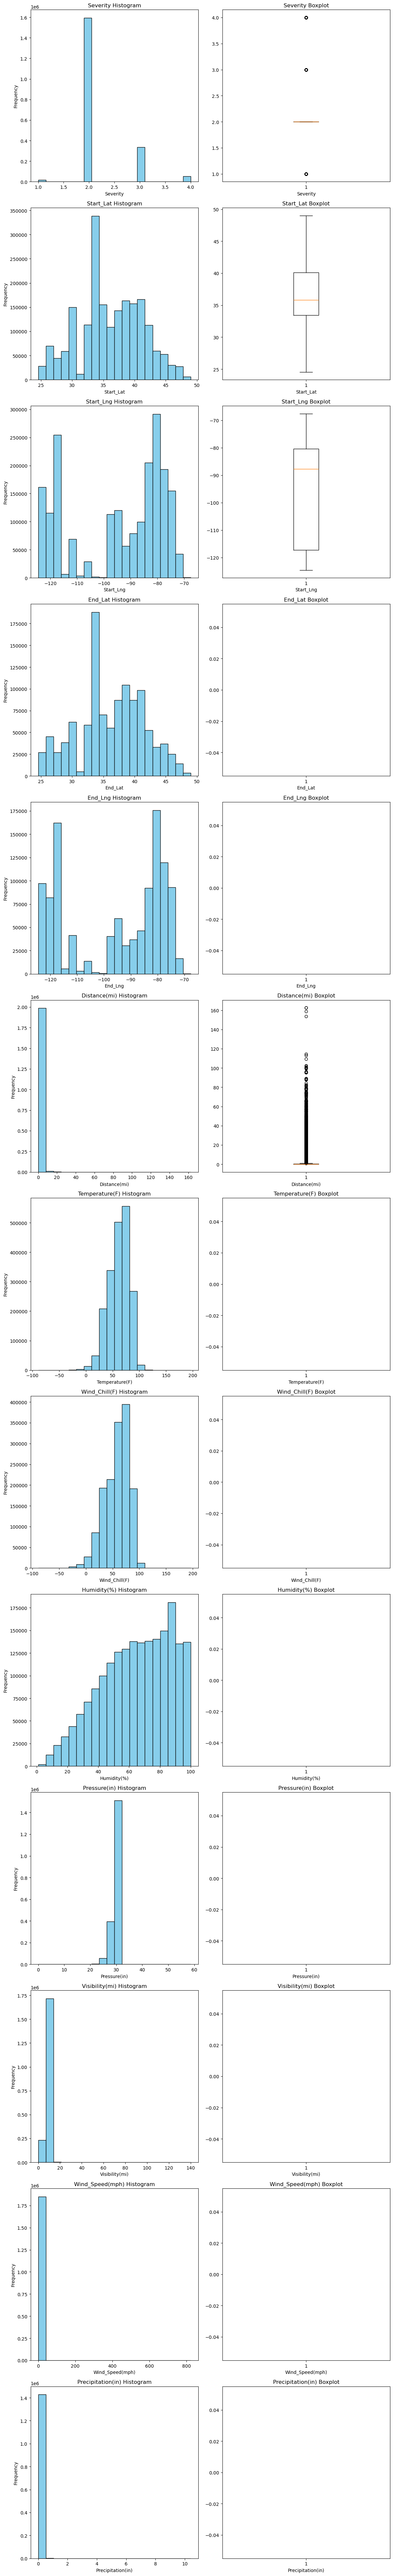

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_numeric_features(df, numeric_features):
    df[numeric_features] = df[numeric_features].apply(pd.to_numeric, errors='coerce')
    df[numeric_features].fillna(0)
    num_cols = len(numeric_features)
    fig, axs = plt.subplots(num_cols, 2, figsize=(12, num_cols*6))

    for i, feature in enumerate(numeric_features):
        # Histogram
        axs[i, 0].hist(df[feature], bins=20, color='skyblue', edgecolor='black')
        axs[i, 0].set_title(f'{feature} Histogram')
        axs[i, 0].set_xlabel(feature)
        axs[i, 0].set_ylabel('Frequency')

        # Boxplot
        axs[i, 1].boxplot(df[feature], vert=True)
        axs[i, 1].set_title(f'{feature} Boxplot')
        axs[i, 1].set_xlabel(feature)
        
    plt.tight_layout()
    plt.show()
plot_numeric_features(df, num_cols)

### These look like they might have outliers: Precipitation, Wind_speed, Visibility, Distance
-This can be handled by normalization

# handling windspeed outliers

In [17]:
unique_wind_speeds = df['Wind_Speed(mph)'].unique()

# Display the unique values
print(unique_wind_speeds)

[  8.1   9.   22.    3.   10.   13.8  21.   15.    9.2  13.    6.    3.5
   6.9  18.   12.7   0.   14.    7.    5.   29.    nan  17.    8.    4.6
  12.   20.   23.    5.8  16.   33.4  10.4  17.3  18.4  11.5  29.9  16.1
  25.   19.6  25.3  21.9  20.7  26.   28.   24.   35.   27.6  26.5  30.
  32.   24.2  31.   32.2  43.   28.8  33.    2.3  39.1 125.   37.  119.
  46.   38.   39.    2.    1.   36.8  60.   35.7  44.    1.2  31.1  36.
  41.   40.   47.  139.   54.1  45.  130.  129.   48.3  34.5  42.6  43.7
  49.   48.  175.  119.7  93.   50.6  41.4  77.   52.  471.8  53.  110.
 132.   81.  116.  105.  127.  142.7  66.7  73.6 214.  822.8 117.   55.
  57.5  67.  161.   40.3  51.   64.   98.   58.7 166.9 131.   82.   97.8
  47.2 230.   61.   44.9  70.   58.  142. ]


In [18]:
# Filter the DataFrame for wind speeds greater than 100 mph
df_wind_speed_gt_100 = df[df['Wind_Speed(mph)'] > 100]

# Check the 'Severity' column for these rows
severity_wind_speed_gt_100 = df_wind_speed_gt_100[['Wind_Speed(mph)','Severity','Weather_Condition']]

# Display the severity values for wind speeds greater than 100 mph
print(severity_wind_speed_gt_100)

         Wind_Speed(mph)  Severity             Weather_Condition
5401972            125.0         2         Light Drizzle / Windy
5648689            119.0         2                  Fair / Windy
4102555            139.0         2            Light Rain / Windy
7447801            130.0         3              Scattered Clouds
7176083            129.0         2            Light Rain / Windy
3965029            139.0         2            Light Rain / Windy
2159982            175.0         3                  Fair / Windy
2635674            119.7         2  Heavy Thunderstorms and Rain
3570459            471.8         4              Scattered Clouds
6502350            110.0         2                Cloudy / Windy
565576             132.0         1                  Fair / Windy
2086553            116.0         2         Mostly Cloudy / Windy
7447802            130.0         3              Scattered Clouds
7004750            105.0         2                  Haze / Windy
4605021            105.0 

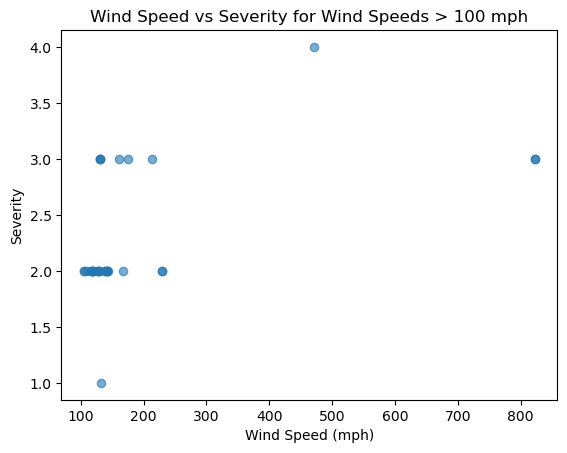

In [19]:
import matplotlib.pyplot as plt

# Plot Wind Speed vs Severity for wind speeds > 100 mph
plt.scatter(df_wind_speed_gt_100['Wind_Speed(mph)'], df_wind_speed_gt_100['Severity'], alpha=0.6)
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Severity')
plt.title('Wind Speed vs Severity for Wind Speeds > 100 mph')
plt.show()

In [20]:
df = df[df['Wind_Speed(mph)'] <= 150]


In [21]:
## pericipitation

In [22]:
df['Precipitation(in)'] = pd.to_numeric(df['Precipitation(in)'], errors='coerce')
# Set the display mode to avoid scientific notation
pd.set_option('display.float_format', '{:.3f}'.format)

# Now, display the DataFrame
print(df[['Precipitation(in)']].head(50))

df['Precipitation(in)'].unique()

         Precipitation(in)
3496177                NaN
6060887              0.000
7115485              0.000
7726141              0.000
6928655              0.000
2854107                NaN
6603047              0.000
4319066              0.000
5029526              0.000
4418051              0.000
3569474              0.000
869667               0.000
2783892                NaN
5959140              0.000
4081915              0.000
5754264              0.000
6606672              0.000
3338522                NaN
4557773              0.000
117596                 NaN
7254094              0.050
2882353                NaN
1281440              0.060
7240293              0.060
2746322                NaN
5869738              0.000
7197223              0.000
1046625              0.000
7045673              0.000
7293662              0.000
1005280              0.000
5371285              0.000
6914870              0.000
3489220                NaN
1849299              0.000
1346230              0.000
7

array([      nan, 0.000e+00, 5.000e-02, 6.000e-02, 7.000e-02, 1.000e-02,
       2.000e-02, 3.000e-02, 4.000e-02, 1.000e-01, 1.100e-01, 1.900e-01,
       1.300e-01, 5.400e-01, 8.000e-02, 1.600e-01, 9.000e-02, 3.400e-01,
       8.900e-01, 1.400e-01, 1.200e-01, 2.000e-01, 2.400e-01, 1.500e-01,
       3.000e-01, 4.200e-01, 2.800e-01, 1.800e-01, 3.500e-01, 2.500e-01,
       2.300e-01, 2.600e-01, 6.200e-01, 4.300e-01, 2.100e-01, 1.700e-01,
       2.900e-01, 6.600e-01, 5.800e-01, 1.130e+00, 3.900e-01, 4.700e-01,
       3.200e-01, 3.100e-01, 2.200e-01, 1.270e+00, 4.000e-01, 3.300e-01,
       3.600e-01, 9.400e-01, 8.000e-01, 9.800e-01, 2.700e-01, 8.200e-01,
       1.370e+00, 4.100e-01, 8.800e-01, 1.320e+00, 9.300e-01, 4.500e-01,
       6.100e-01, 1.070e+00, 5.000e-01, 3.700e-01, 5.600e-01, 5.100e-01,
       9.990e+00, 6.500e-01, 3.800e-01, 9.980e+00, 2.010e+00, 4.600e-01,
       7.700e-01, 4.400e-01, 7.100e-01, 9.900e-01, 7.200e-01, 7.600e-01,
       5.700e-01, 7.300e-01, 6.800e-01, 8.100e-01, 

In [23]:
# Calculate the percentage of 0.000 values in the 'Precipitation(in)' column
zero_count = (df['Precipitation(in)'] == 0.0).sum()
total_count = len(df)

# Calculate percentage of 0.000 values
percentage_zeros = (zero_count / total_count) * 100

percentage_zeros

68.9238683627393

In [24]:
# Check the data type of the 'Precipitation(in)' column
print(df['Precipitation(in)'].dtype)


float64


In [25]:
def plot_boolean_features(df, bool_features):
    # Calculate the number of rows and columns for subplots
    num_features = len(bool_features)
    num_rows = num_features // 2 + num_features % 2
    num_cols = 2

    # Create subplots with rectangular shape
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 30))

    # Flatten the axes array to make it easier to iterate
    axes = axes.flatten()

    # Plot boolean counts for specified features
    for i, feature in enumerate(bool_features):
        counts = df[feature].value_counts()
        counts.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Boolean counts for {feature}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Count')

    # Hide empty subplots
    for j in range(num_features, num_rows * num_cols):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

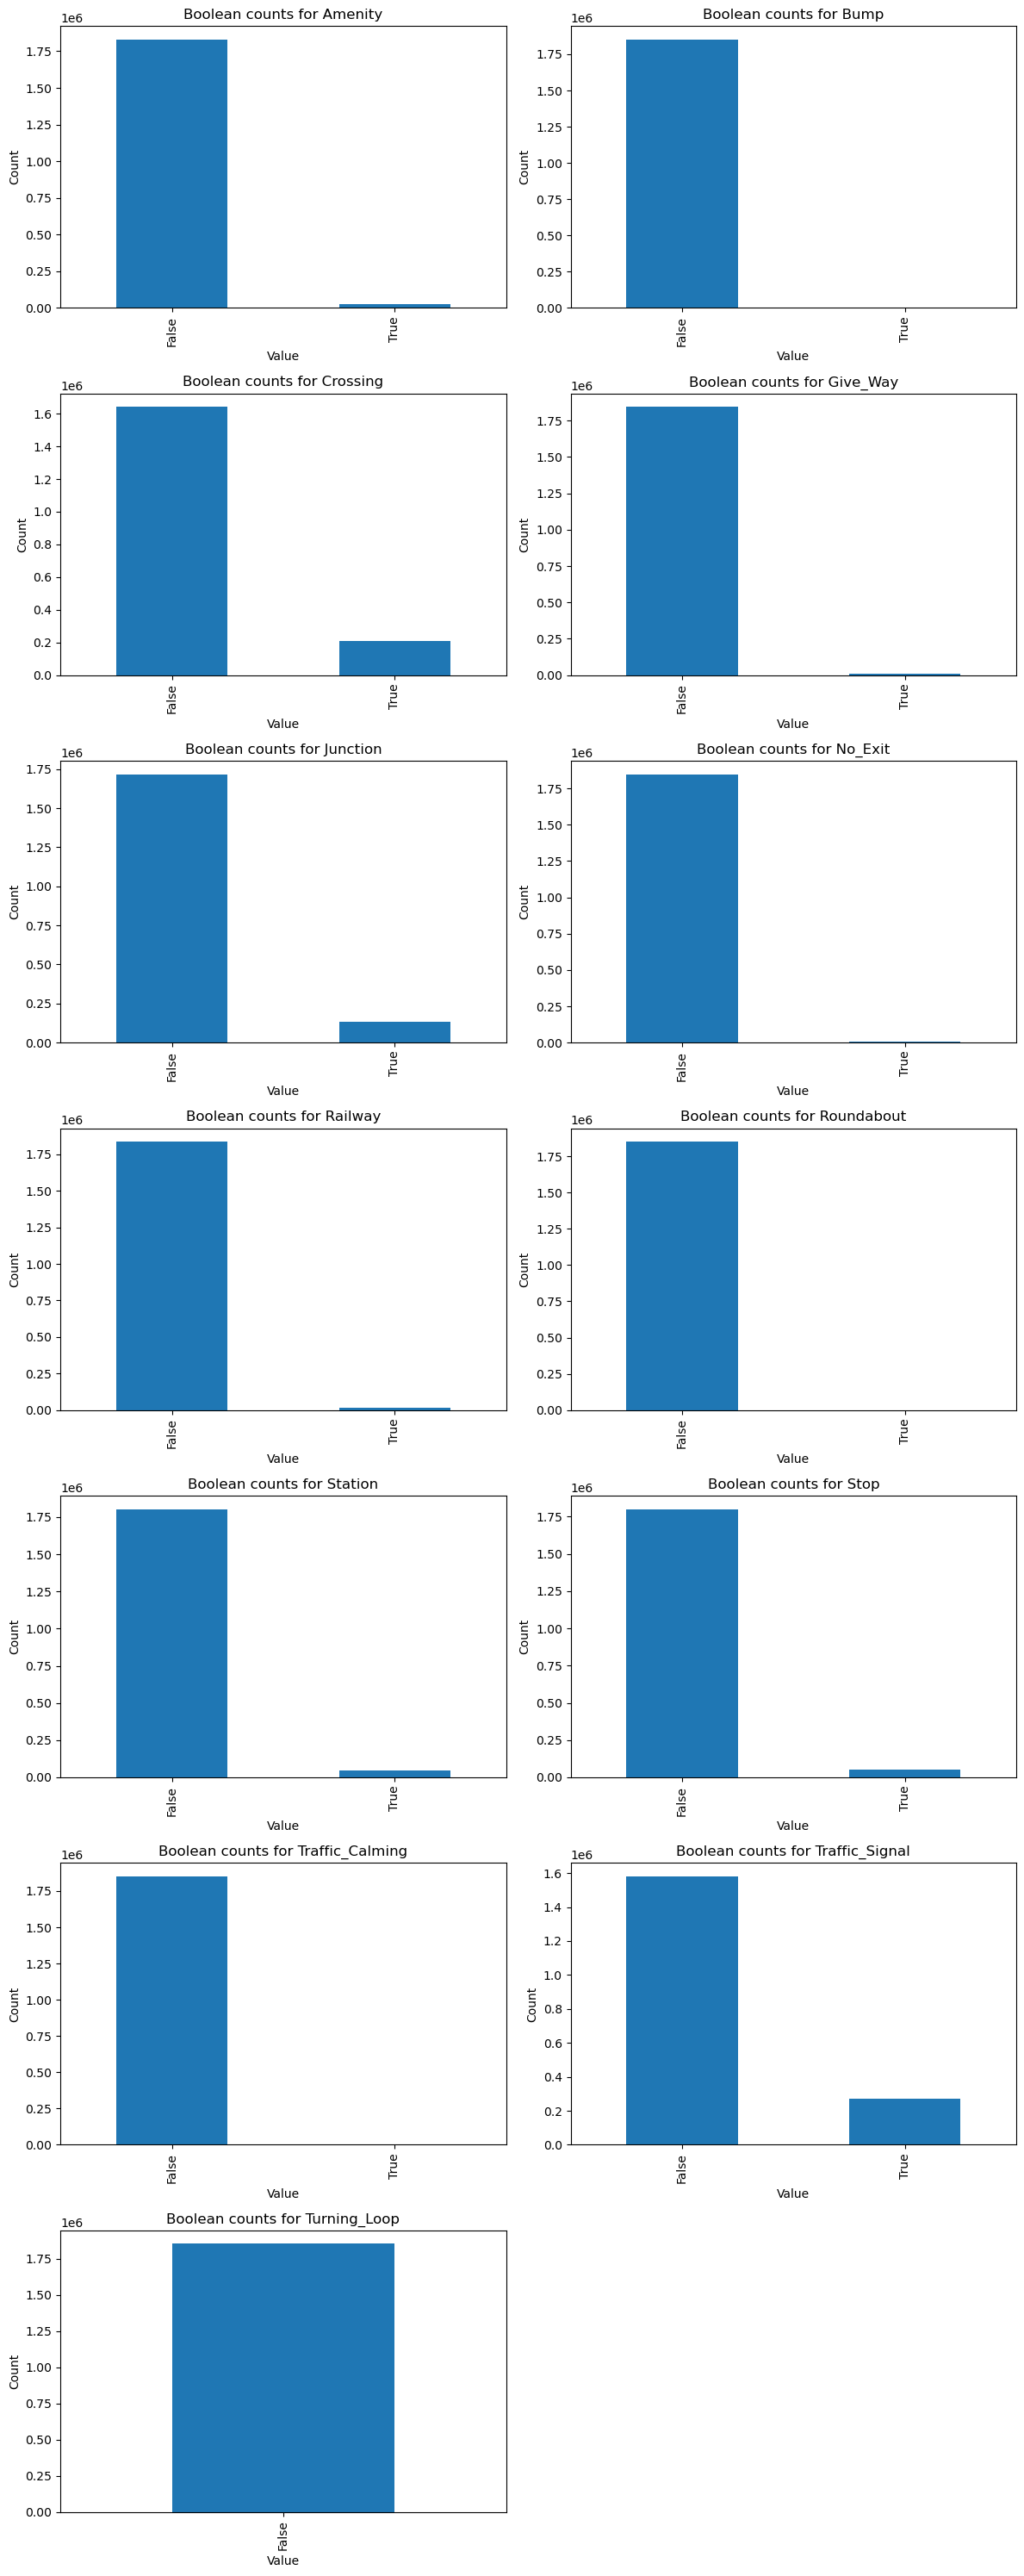

In [26]:
plot_boolean_features(df, bool_cols)

In [27]:
for column in df[bool_cols].columns:
    true_percentage = df[column].mean() * 100
    false_percentage = 100 - true_percentage

    print(column)
    print(f"Percentage of True: {true_percentage:.2f}%")
    print(f"Percentage of False: {false_percentage:.2f}%")
    print()

Amenity
Percentage of True: 1.24%
Percentage of False: 98.76%

Bump
Percentage of True: 0.05%
Percentage of False: 99.95%

Crossing
Percentage of True: 11.41%
Percentage of False: 88.59%

Give_Way
Percentage of True: 0.47%
Percentage of False: 99.53%

Junction
Percentage of True: 7.31%
Percentage of False: 92.69%

No_Exit
Percentage of True: 0.26%
Percentage of False: 99.74%

Railway
Percentage of True: 0.86%
Percentage of False: 99.14%

Roundabout
Percentage of True: 0.00%
Percentage of False: 100.00%

Station
Percentage of True: 2.63%
Percentage of False: 97.37%

Stop
Percentage of True: 2.78%
Percentage of False: 97.22%

Traffic_Calming
Percentage of True: 0.10%
Percentage of False: 99.90%

Traffic_Signal
Percentage of True: 14.71%
Percentage of False: 85.29%

Turning_Loop
Percentage of True: 0.00%
Percentage of False: 100.00%



#### In all these cases, the false values is in a lot more instances than the true value.

In [28]:
def plot_top_categories(df, cat_features):
    # Calculate the number of rows and columns for subplots
    num_features = len(df[cat_features].columns)
    num_rows = num_features // 2 + num_features % 2
    num_cols = 2

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 50))

    # Flatten the axes array to make it easier to iterate
    axes = axes.flatten()

    # Plot top categories for each categorical feature
    for i, column in enumerate(df[cat_features].columns):
        top_categories = df[column].value_counts().nlargest(50)
        top_categories.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Top categories for {column}')
        axes[i].set_xlabel('Category')
        axes[i].set_ylabel('Count')

    # Hide empty subplots
    for j in range(num_features, num_rows * num_cols):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


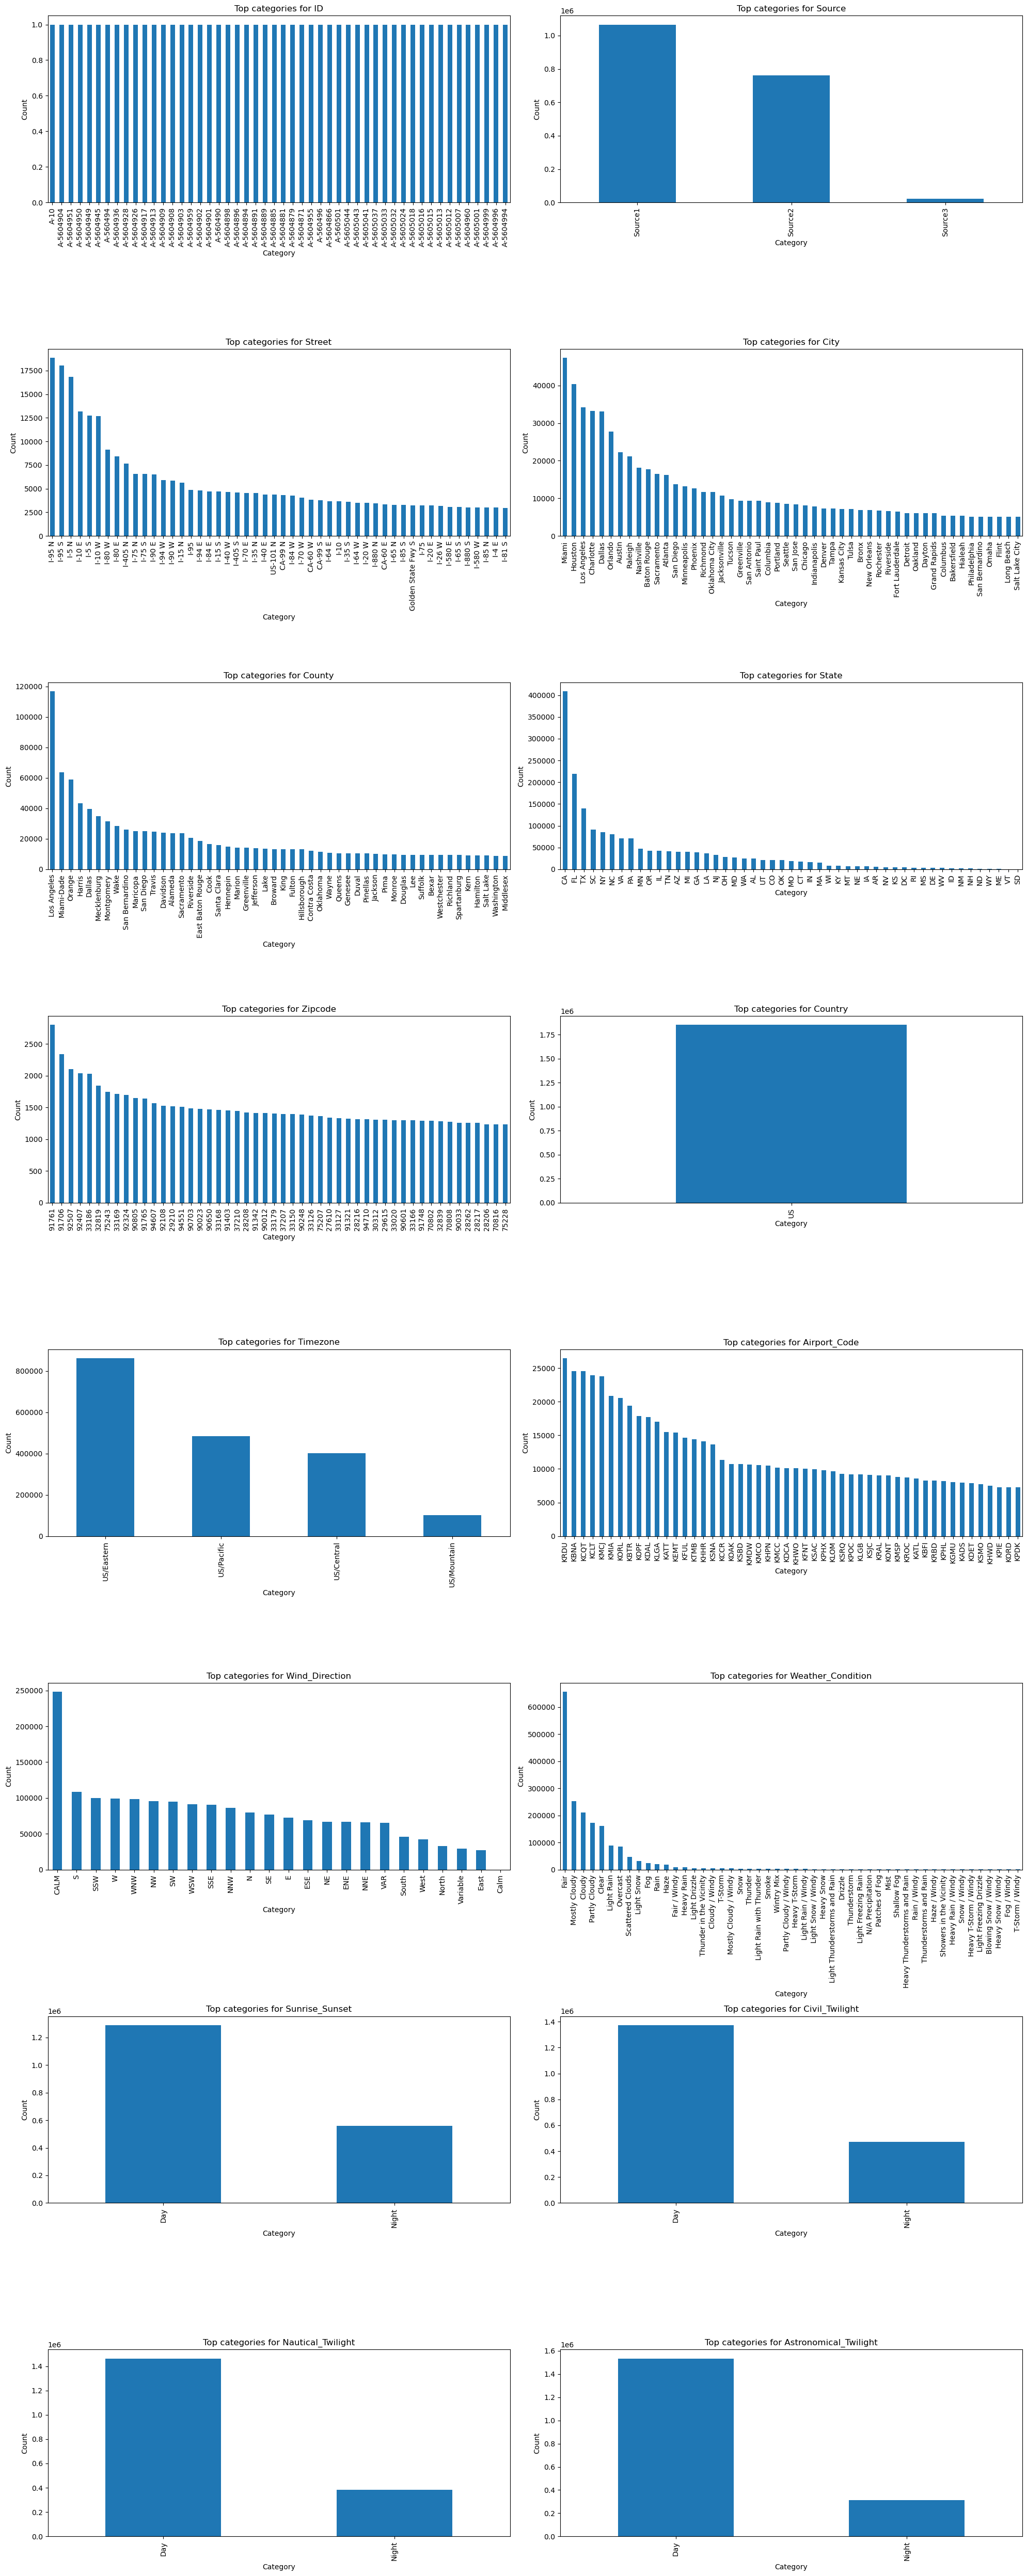

In [29]:
plot_top_categories(df, cat_cols)

ID feature can be cut out. It only has unique values.

Tne same goes for Country. Every instance is from the US.

Weather_Condition has a lot of categories. 

This is because the weather types can be of different strenghts (a lot of rain, and just a bit of rain). It also comes several wather types for some values (Ex "Mostly Cloudy / Windy"). This results in a lot of categories being little used. Maby it's better to create more features for the weater_condition, that combine several categories. For eaxmple there could be a boolean feature called "Windy", that has a boolean feature for wether it was windy. Or a categorical value for how windy it was (ex Very windy, windy, a little windy, not windy).

## Rare categories

In [30]:
total_samples = len(df)
rare_category_counts = {}

for feature in df[cat_cols].columns:
    category_counts = df[feature].value_counts(normalize=True)
    rare_categories = category_counts[category_counts < 0.01]
    total_rare_percentage = rare_categories.sum() * 100
    rare_category_counts[feature] = total_rare_percentage

for feature, percentage in rare_category_counts.items():
    print(f"Feature '{feature}': {percentage:.2f}% of categories are rare (<1%) throughout the dataset.")


Feature 'ID': 100.00% of categories are rare (<1%) throughout the dataset.
Feature 'Source': 0.00% of categories are rare (<1%) throughout the dataset.
Feature 'Street': 98.98% of categories are rare (<1%) throughout the dataset.
Feature 'City': 86.00% of categories are rare (<1%) throughout the dataset.
Feature 'County': 66.05% of categories are rare (<1%) throughout the dataset.
Feature 'State': 7.07% of categories are rare (<1%) throughout the dataset.
Feature 'Zipcode': 100.00% of categories are rare (<1%) throughout the dataset.
Feature 'Country': 0.00% of categories are rare (<1%) throughout the dataset.
Feature 'Timezone': 0.00% of categories are rare (<1%) throughout the dataset.
Feature 'Airport_Code': 90.06% of categories are rare (<1%) throughout the dataset.
Feature 'Wind_Direction': 0.00% of categories are rare (<1%) throughout the dataset.
Feature 'Weather_Condition': 5.36% of categories are rare (<1%) throughout the dataset.
Feature 'Sunrise_Sunset': 0.00% of categories 

We can see that some features have a lot of rare categories.

Zipcode and Airport_Code has too many rare categories. These features should be removed.

We might be able to keep City and County. These features can be investigated further.

Some features have very few rare categories. In these cases, those rare categories can be combined.

## Conclusions for feature analysis
We made the following observations and conclusions:
- The date features for dates need to be split up. One feature for the date, and one feature for the time.
- The minute and second for the time features can be cut out. I think it's better to convert the this hour feature to rather be a category for what time of the day it is: early-morning, mid-day, or late night.
- The descriptions can be handled using vectorization like TF-IDF.
- I can handle the categories by using one-hot encoding.


- The numerical features will have their null values turned into 0.
- The boolean features will have their null values turned into false.
- The categorical have few null values. These null values will be made into their own category.
- The datetime features will later be encoded into numerical values. I think it's appropriate then to turn the null datetime values into 0.


- These seem like they might have outliers: Precipitation, Wind_speed, Visibility, Distance. This can be fixed by normalization.
- For the boolean features, there are a lot more false instances than true instances.
- Turning_Loop can be removed.
- ID and Country should be removed.
- Weather_Condtition categories can be combined

- Start_Lng & End_Lng has a lot of correlation. Since End_Lng also has a lot of null values, it can be removed.
- Start_Lat & End_Lat has a lot of correlation. Since End_Lat also has a lot of null values, it can be removed.
- Wind_Chill & Temperature as a lot of correlation. Since Wind_Chill also has a lot of null values, it can be removed.

### UNIVARIATE ANALYSIS


### CITIES

In [31]:
df.City.unique()

['Xenia', 'Lake Zurich', 'Fairfield', 'Huntington', 'Millville', ..., 'Keene Valley', 'Urbancrest', 'Cohutta', 'Rudolph', 'Sugar Run']
Length: 11481
Categories (11877, object): ['Aaronsburg', 'Abbeville', 'Abbotsford', 'Abbott', ..., 'Zumbro Falls', 'Zumbrota', 'Zuni', 'Zwingle']

In [32]:
cities_by_accident = df.City.value_counts()
cities_by_accident

City
Miami                     47308
Houston                   40398
Los Angeles               34161
Charlotte                 33189
Dallas                    33157
                          ...  
Stump Creek                   0
District 4 Kent Island        0
District 6                    0
Low Moor                      0
Grenora                       0
Name: count, Length: 11877, dtype: int64

In [33]:
cities_by_accident[:20]

City
Miami            47308
Houston          40398
Los Angeles      34161
Charlotte        33189
Dallas           33157
Orlando          27687
Austin           22302
Raleigh          21181
Nashville        18132
Baton Rouge      17722
Sacramento       16436
Atlanta          16199
San Diego        13730
Minneapolis      13163
Phoenix          12589
Richmond         11720
Oklahoma City    11669
Jacksonville     10680
Tucson            9722
Greenville        9353
Name: count, dtype: int64

<Axes: ylabel='City'>

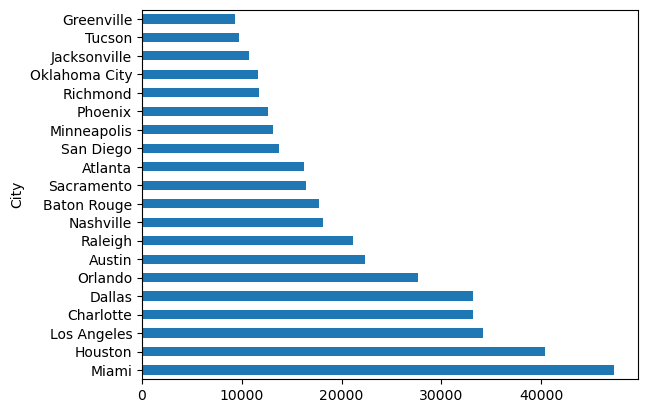

In [34]:
cities_by_accident[:20].plot(kind='barh')

In [35]:
cities_by_accident[cities_by_accident < 10]

City
Britt                     9
Saucier                   9
Ismay                     9
Hedgesville               9
Hager City                9
                         ..
Stump Creek               0
District 4 Kent Island    0
District 6                0
Low Moor                  0
Grenora                   0
Name: count, Length: 5350, dtype: int64

In [36]:
percentage_less_than_10 = (cities_by_accident[cities_by_accident < 10].count() / cities_by_accident.count()) * 100
print(percentage_less_than_10)

45.04504504504504


### more than 1/3 rd cities have less than 10 accidents

In [37]:
# Count cities with more than 1000 yearly accidents
cities_above_1000 = cities_by_accident[cities_by_accident > 1000].count()

# Total number of cities
total_cities = cities_by_accident.count()

print((cities_above_1000/total_cities)*100)

2.3406584154247705


### Around 10% cities have more than 1000 accidents 

### Severity?

In [38]:
df["Severity"].value_counts() 

Severity
2    1490441
3     297492
4      47468
1      17114
Name: count, dtype: int64

In [39]:
df["Severity"].value_counts()  / len(df["Severity"])

Severity
2   0.805
3   0.161
4   0.026
1   0.009
Name: count, dtype: float64

### start time

/var/folders/lf/q5q0rrfs191929d6nghtfljm0000gn/T/ipykernel_43394/1536128045.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

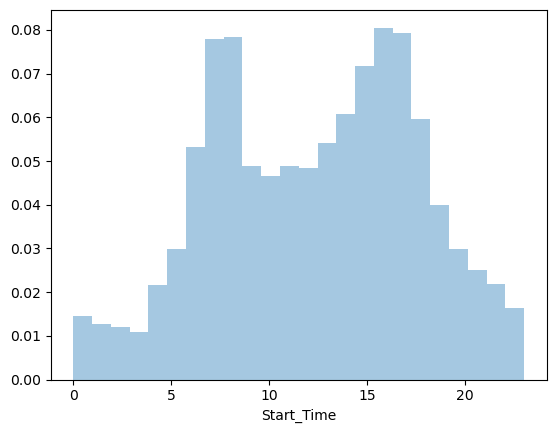

In [40]:
#count by time 
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

### 6 to 9 am and then 3-6 are high accident prone times

### day of the week

/var/folders/lf/q5q0rrfs191929d6nghtfljm0000gn/T/ipykernel_43394/2840151705.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

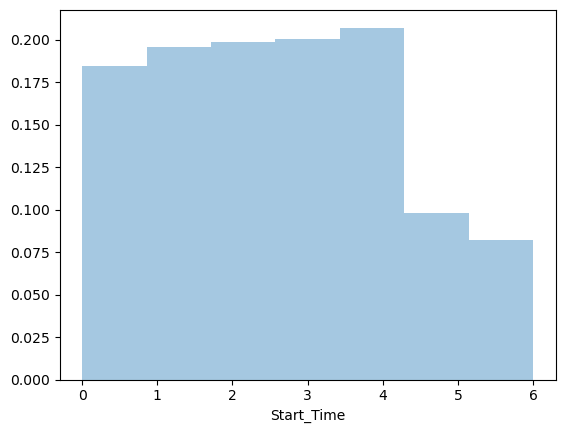

In [41]:
## Days of Week
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

### weekdays have higher number of accidents compared to weekends

### Month 

/var/folders/lf/q5q0rrfs191929d6nghtfljm0000gn/T/ipykernel_43394/1524892971.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

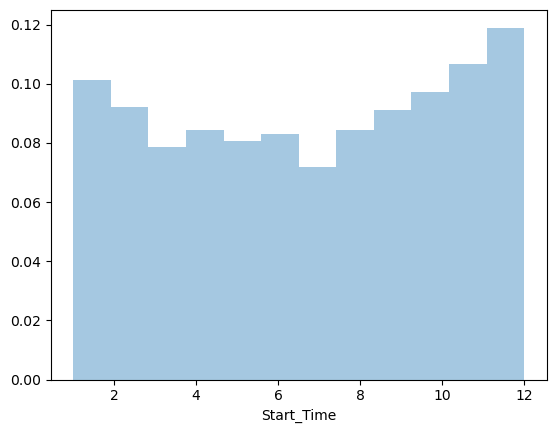

In [42]:
## Month
sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

#### Year

/var/folders/lf/q5q0rrfs191929d6nghtfljm0000gn/T/ipykernel_43394/3851871308.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.year, bins=8, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

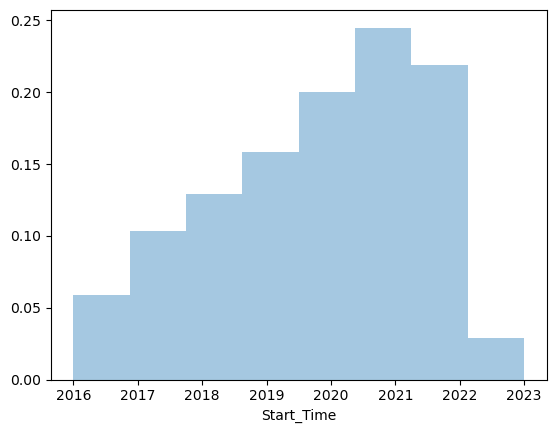

In [43]:
## Year
sns.distplot(df.Start_Time.dt.year, bins=8, kde=False, norm_hist=True)

### Much data is missing for 2016. Maybe even 2017.

### Distrubution by week of the day 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

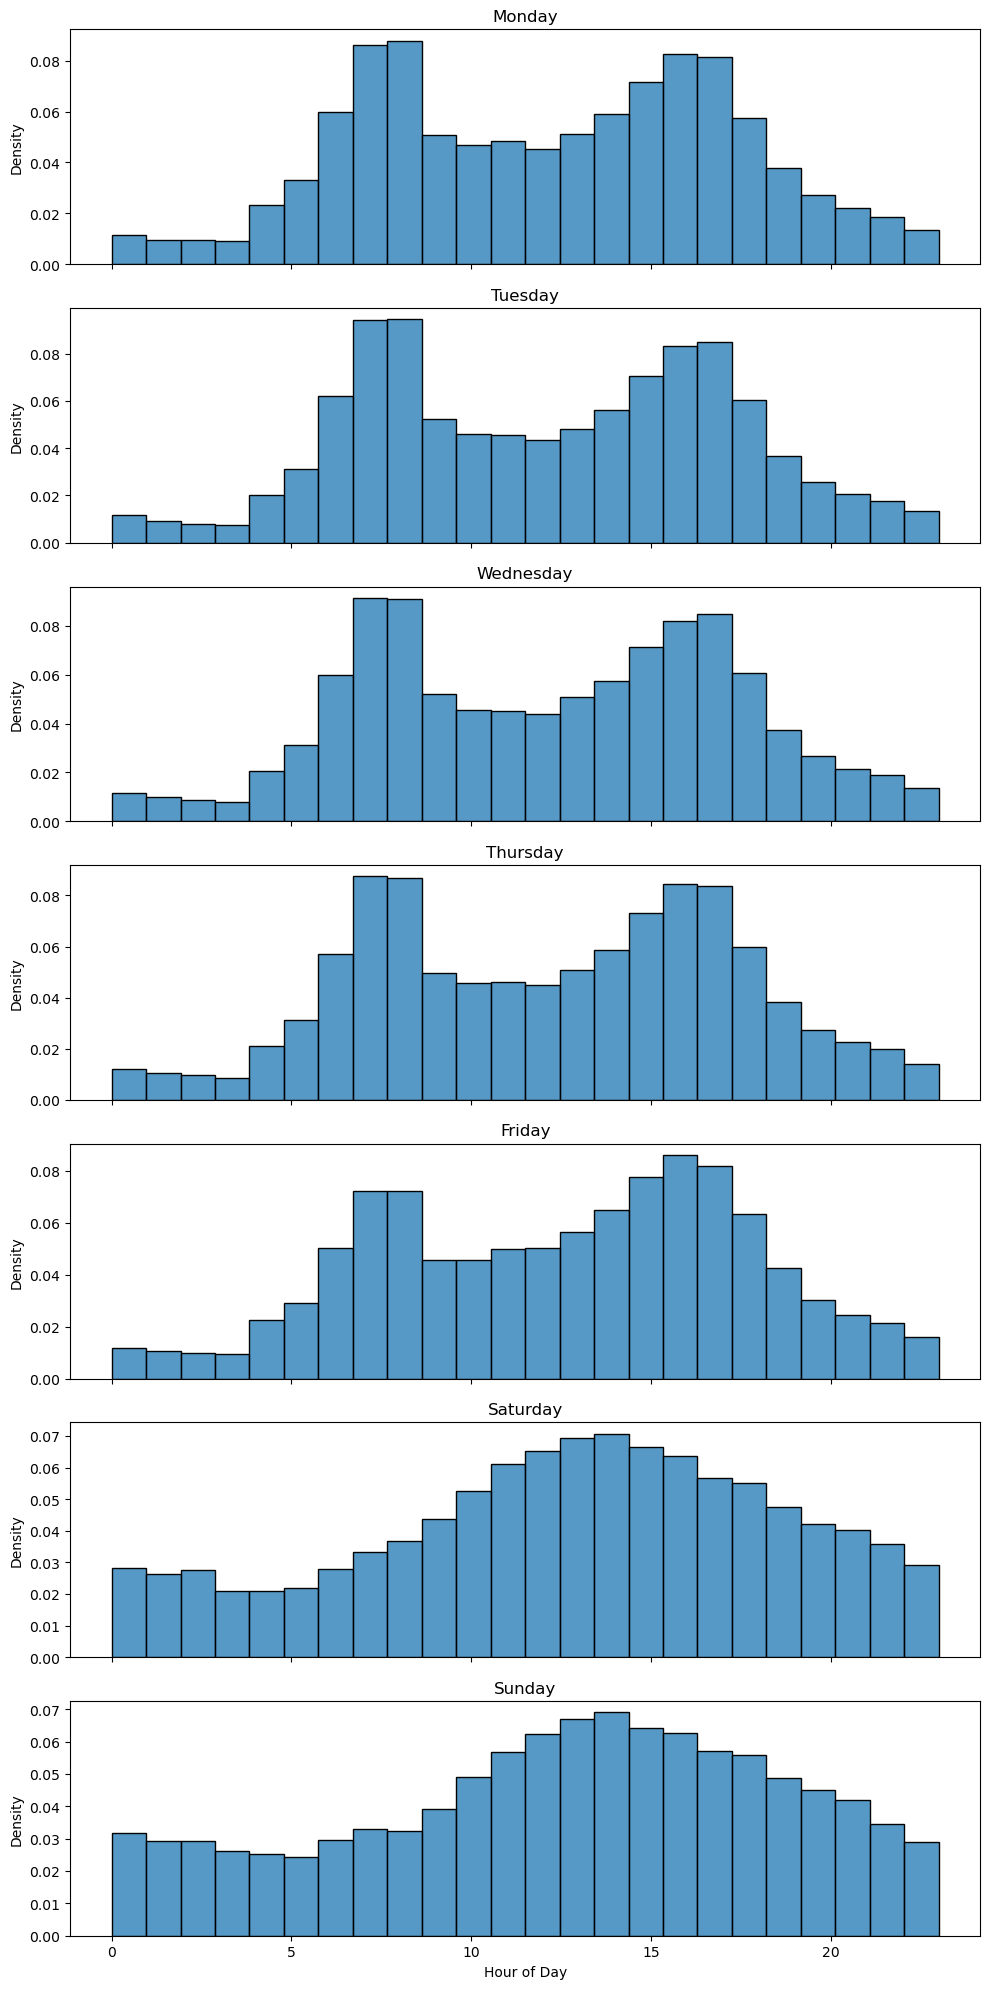

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axis grid for 7 days (one per subplot)
fig, axes = plt.subplots(7, 1, figsize=(10, 20), sharex=True)

# Loop through each day of the week (0=Monday, 6=Sunday)
for day in range(7):
    # Filter Start_Time for each day
    day_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == day]
    
    # Plot the distribution of hours for each day on its respective subplot
    sns.histplot(day_start_time.dt.hour, bins=24, kde=False, stat="density", ax=axes[day])
    
    # Set the title to the day of the week
    axes[day].set_title(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'][day])

# Label the x-axis and improve layout
plt.xlabel("Hour of Day")
plt.tight_layout()
plt.show()


### On Sundays, the peak occurs between 10 am and 3 pm, unlike weekdays

### sunrise vs sunset 

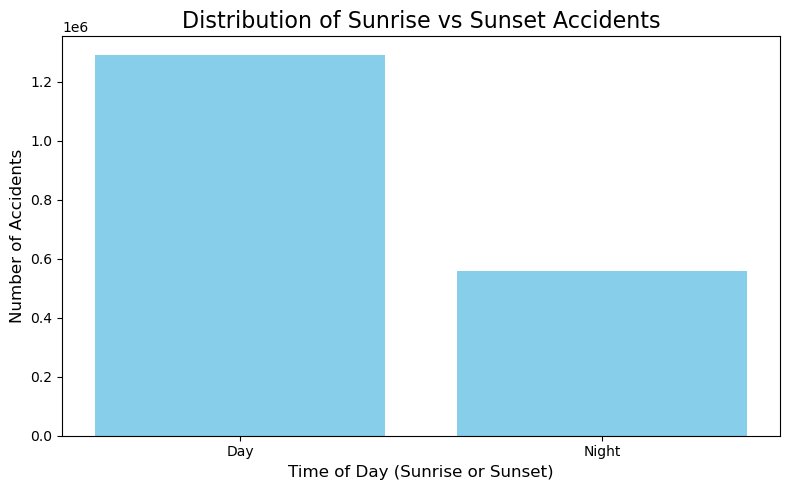

In [45]:
# Count the occurrences of each value in the 'Sunrise_Sunset' column
sunrise_sunset_counts = df['Sunrise_Sunset'].value_counts()

# Plot the value counts as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(sunrise_sunset_counts.index, sunrise_sunset_counts.values, color='skyblue')

# Add labels and title
plt.title('Distribution of Sunrise vs Sunset Accidents', fontsize=16)
plt.xlabel('Time of Day (Sunrise or Sunset)', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Show the correct y-axis (count of accidents)
plt.tight_layout()
plt.show()

### Most of the accidents occured during day

### distrubution by time zone

In [46]:
df.Timezone.value_counts()/len(df.Timezone)*100

Timezone
US/Eastern    46.546
US/Pacific    26.217
US/Central    21.721
US/Mountain    5.516
Name: count, dtype: float64

### Weather conditions

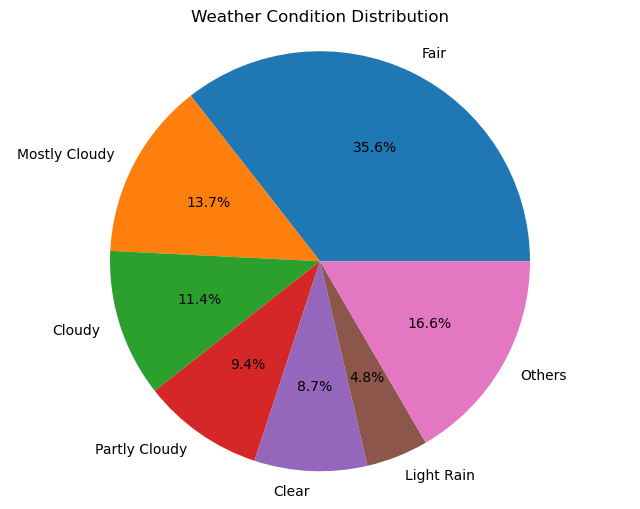

In [47]:
# Graph the Weather conditions in a Pie Chart
weather_counts = df['Weather_Condition'].value_counts()

# Group the main categories of weather conditions
top_conditions = weather_counts.head(6)
other_conditions_count = weather_counts.iloc[6:].sum()

# Create a new DataFrame with the summarized weather conditions
summary_weather_counts = pd.DataFrame(top_conditions).reset_index()
summary_weather_counts.columns = ['Weather_Condition', 'Count']

others_row = pd.DataFrame({'Weather_Condition': ['Others'], 'Count': [other_conditions_count]})
summary_weather_counts = pd.concat([summary_weather_counts, others_row], ignore_index=True)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(summary_weather_counts['Count'], labels=summary_weather_counts['Weather_Condition'], autopct='%1.1f%%')
plt.title('Weather Condition Distribution')
plt.axis('equal')
plt.show()

### Accidents by season

In [48]:
import pandas as pd

# First, extract the month from 'Start_Time'
df['Month'] = df['Start_Time'].dt.month

# Define a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create a new 'Season' column
df['Season'] = df['Month'].apply(get_season)

# Count accidents per season
accidents_by_season = df['Season'].value_counts(normalize=True) * 100

# Display percentage of accidents by season
accidents_by_season

Season
Fall     34.438
Winter   25.761
Spring   20.075
Summer   19.727
Name: proportion, dtype: float64

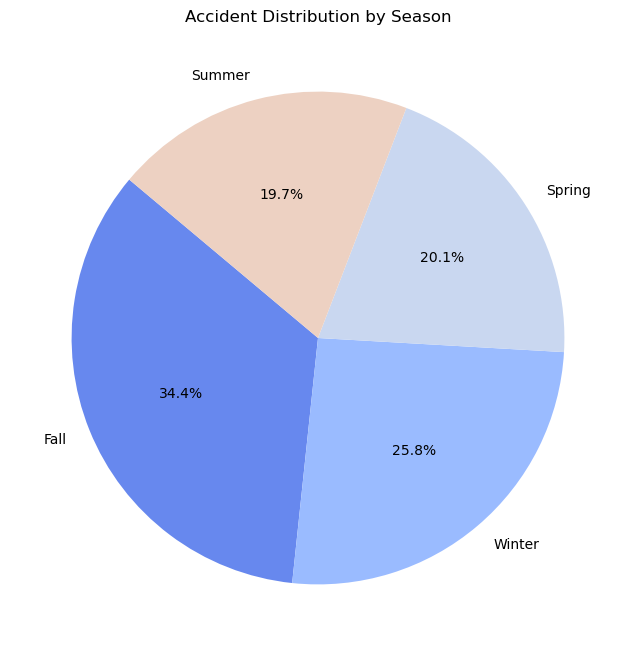

In [49]:
# Pie chart of accidents by season
plt.figure(figsize=(8, 8))
plt.pie(accidents_by_season.values, labels=accidents_by_season.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("coolwarm"))
plt.title("Accident Distribution by Season")
plt.show()


### presence of crossing in nearby location

In [50]:
df.Crossing.value_counts()/len(df.Crossing)*100

Crossing
False   88.586
True    11.414
Name: count, dtype: float64

### presence if traffic signal in nearby location

In [51]:
df.Traffic_Signal.value_counts()/len(df.Traffic_Signal)*100

Traffic_Signal
False   85.289
True    14.711
Name: count, dtype: float64

### Accidents by state

/var/folders/lf/q5q0rrfs191929d6nghtfljm0000gn/T/ipykernel_43394/3778158878.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{y/1_000_000:.1f}M' for y in plt.gca().get_yticks()])


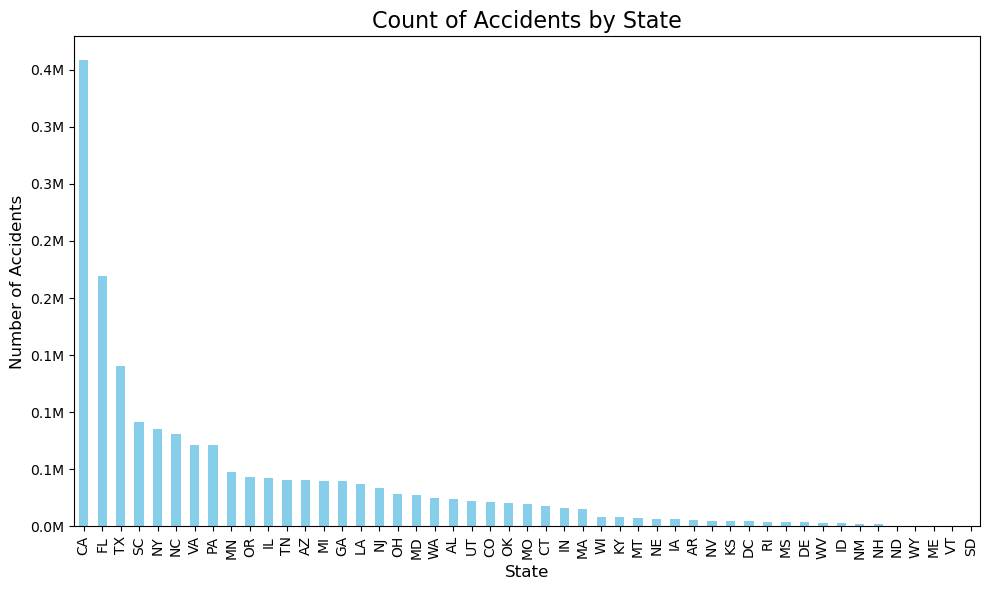

In [52]:
# Count the number of accidents by state
accident_count_by_state = df['State'].value_counts()

# Create a bar plot
plt.figure(figsize=(10,6))
accident_count_by_state.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Count of Accidents by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.gca().set_yticklabels([f'{y/1_000_000:.1f}M' for y in plt.gca().get_yticks()])
# Display the plot
plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()

/var/folders/lf/q5q0rrfs191929d6nghtfljm0000gn/T/ipykernel_43394/2013015846.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{y/1_000_000:.1f}M' for y in plt.gca().get_yticks()])


Top 20 States with the Most Accidents:
State
CA    408668
FL    219100
TX    140118
SC     91100
NY     85465
NC     80786
VA     71063
PA     71028
MN     47507
OR     43007
IL     42242
TN     41073
AZ     40542
MI     40090
GA     39502
LA     37153
NJ     33413
OH     28807
MD     27590
WA     25185
Name: count, dtype: int64


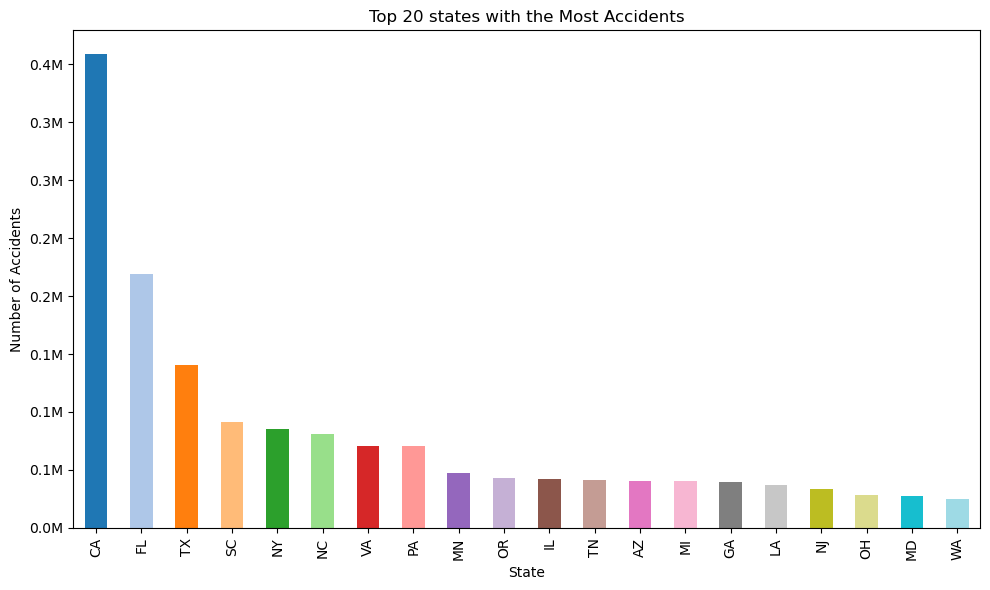

In [53]:
# Get the top 20 Stateswith the most accidents
accidents_by_state = df['State'].value_counts()

top_20_states = accidents_by_state.head(20)
print("Top 20 States with the Most Accidents:")
print(top_20_states)
# Create the bar plot
plt.figure(figsize=(10, 6))
color_range = range(len(top_20_states))
top_20_states.plot(kind='bar',color=plt.get_cmap('tab20')(range(len(color_range))))

plt.title('Top 20 states with the Most Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.gca().set_yticklabels([f'{y/1_000_000:.1f}M' for y in plt.gca().get_yticks()])

# Show the bar plot
plt.tight_layout()
plt.show()

### Accidents by cities

In [54]:
# Get the top 20 cities with the most accidents
accidents_by_city = df['City'].value_counts()

top_20_cities = accidents_by_city.head(20)
print("Top 20 Cities with the Most Accidents:")
print(top_20_cities)

Top 20 Cities with the Most Accidents:
City
Miami            47308
Houston          40398
Los Angeles      34161
Charlotte        33189
Dallas           33157
Orlando          27687
Austin           22302
Raleigh          21181
Nashville        18132
Baton Rouge      17722
Sacramento       16436
Atlanta          16199
San Diego        13730
Minneapolis      13163
Phoenix          12589
Richmond         11720
Oklahoma City    11669
Jacksonville     10680
Tucson            9722
Greenville        9353
Name: count, dtype: int64


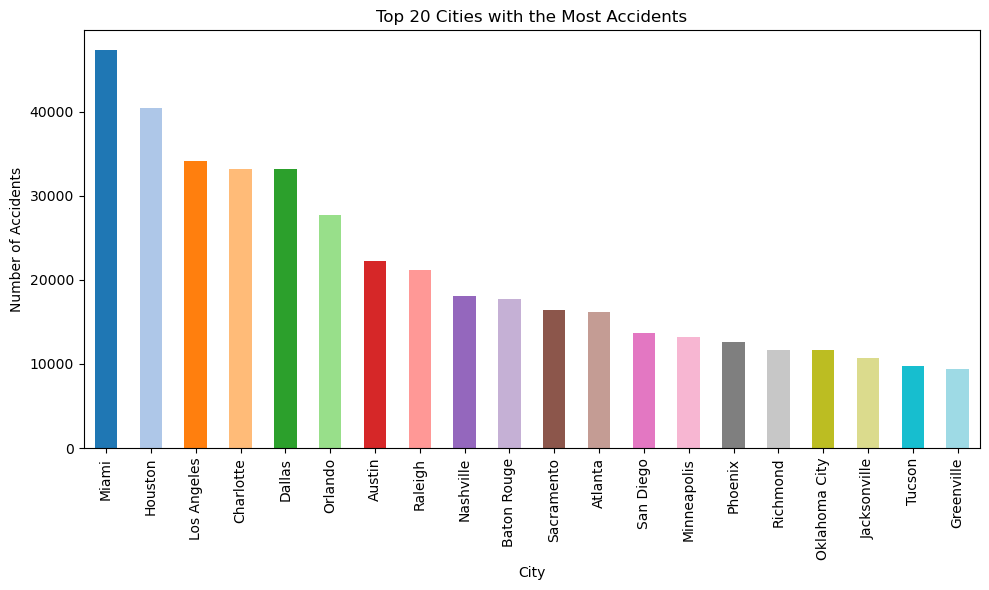

In [55]:
# Create the bar plot
plt.figure(figsize=(10, 6))
color_range = range(50)
top_20_cities.plot(kind='bar', color=plt.get_cmap('tab20')(range(len(color_range))))

plt.title('Top 20 Cities with the Most Accidents')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

# Show the bar plot
plt.tight_layout()
plt.show()

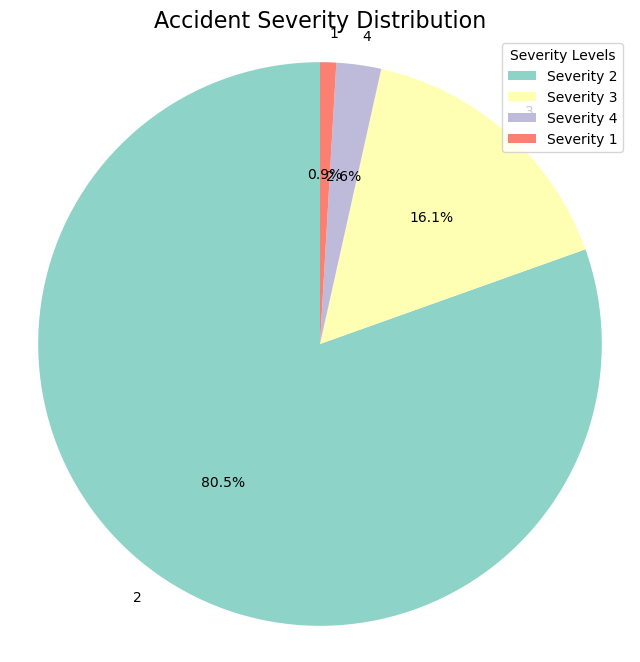

In [56]:
# Count the number of accidents by severity level
severity_counts = df['Severity'].value_counts()

# Create a color palette
colors = plt.get_cmap('Set3').colors

# Create the pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', 
                                   colors=colors, startangle=90)

# Add a title
plt.title('Accident Severity Distribution', fontsize=16)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Create a legend to show which color corresponds to which severity level
plt.legend(wedges, [f"Severity {i}" for i in severity_counts.index], title="Severity Levels", loc="best")

# Show the pie chart
plt.show()

## Map of US whhich shows the severity of the accidents.

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

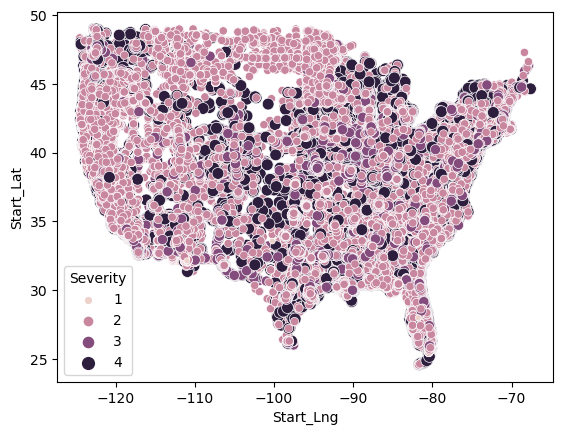

In [57]:
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat,data=df,size=df.Severity, hue=df.Severity)

# map of US which shows the density of the accidents.

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

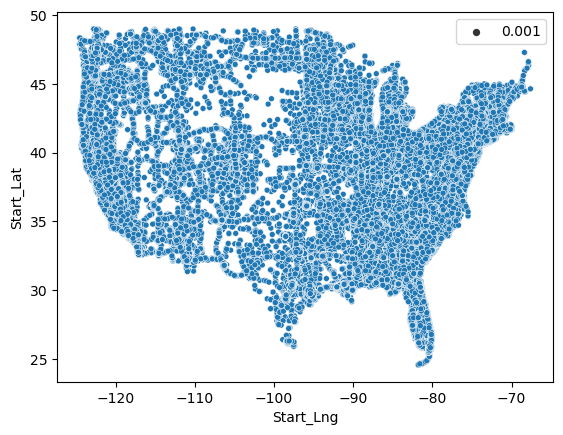

In [58]:
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat,data=df,size=0.001)

### We see that most instances are along the coast and in big cities, which is not suprising considering these areas have the highest populations.

## Correlation 

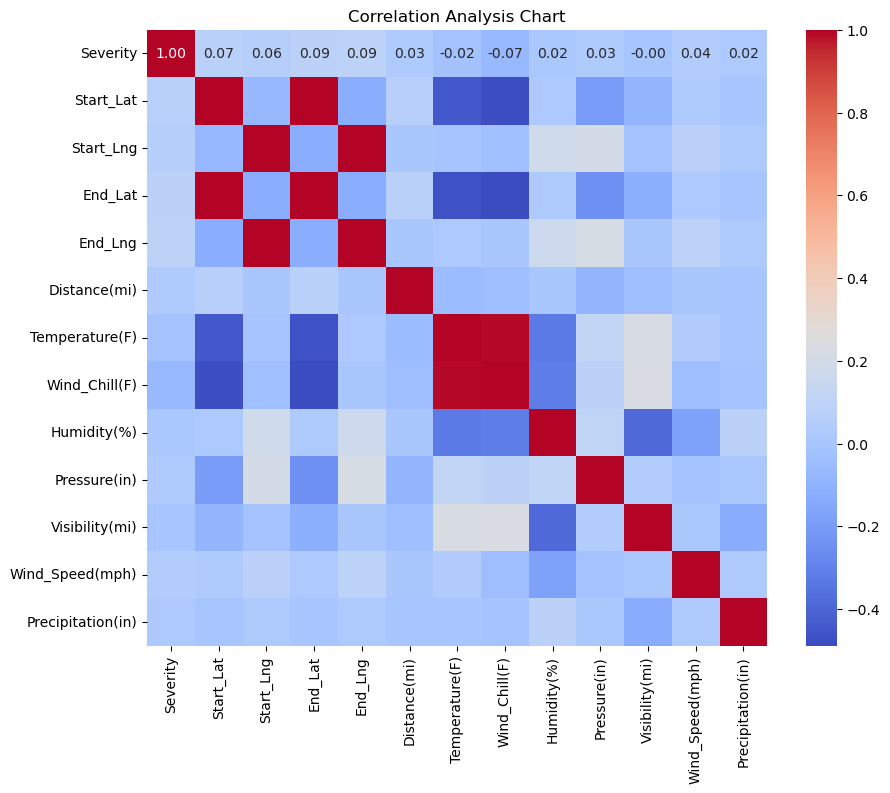

In [59]:
correlation_matrix = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Analysis Chart')
plt.show()

End_Lat and Start_lat have the same values.

The same goes for End_Lng and Start_Lng.

Wind_Chill and Temperature have almost exact correlation.

Some features have a little inverse correlation (ex Temperature & Start_Lng, Wind_Chill & End_Lat, Visibility & Humidity)

In [60]:
def make_scatter_plot(df, feature1, feature2):
    plt.figure(figsize=(8, 6))
    x = df[feature1]
    y = df[feature2]
    plt.scatter(x, y, color='blue', alpha=0.7)
    plt.title(f'{feature1} vs {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.grid(True)
    plt.show()

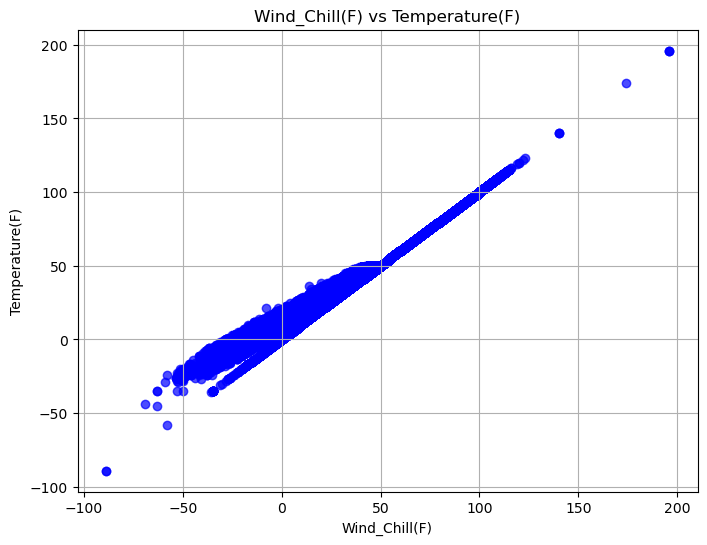

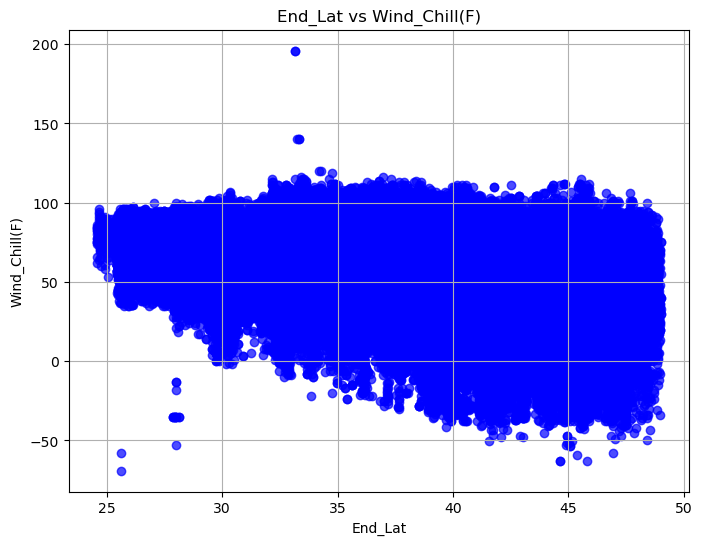

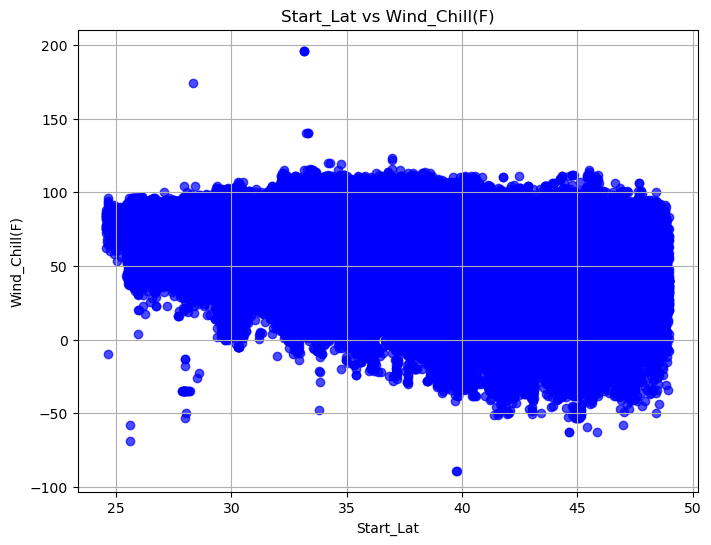

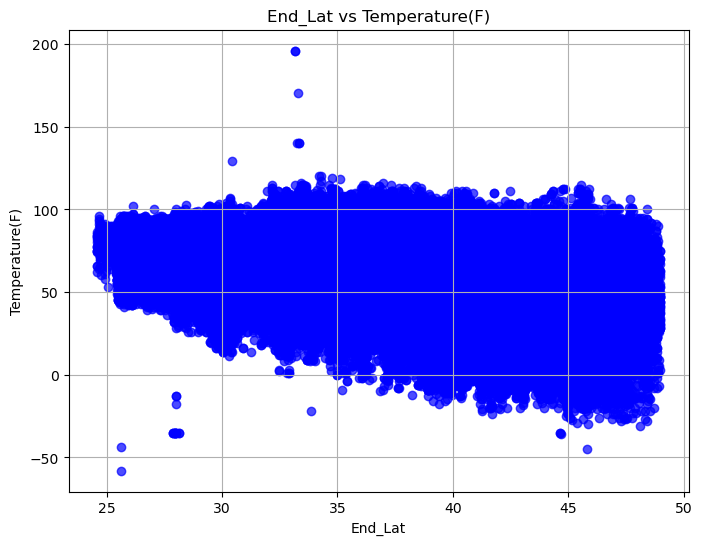

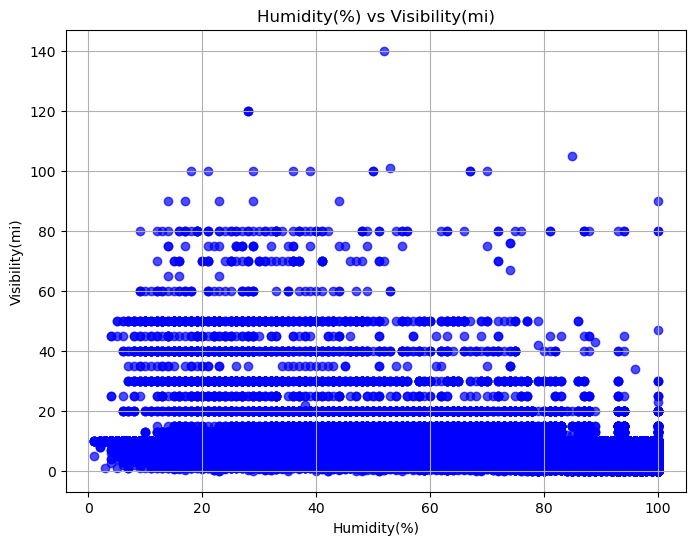

In [61]:
make_scatter_plot(df, "Wind_Chill(F)", "Temperature(F)")
make_scatter_plot(df, "End_Lat", "Wind_Chill(F)")
make_scatter_plot(df, "Start_Lat", "Wind_Chill(F)")
make_scatter_plot(df, "End_Lat", "Temperature(F)")
make_scatter_plot(df, "Humidity(%)", "Visibility(mi)")

### Conclusions
- Start_Lng & End_Lng has a lot of correlation. Since End_Lng also has a lot of null values, it can be removed.
- Start_Lat & End_Lat has a lot of correlation. Since End_Lat also has a lot of null values, it can be removed.
- Wind_Chill & Temperature as a lot of correlation. Since Wind_Chill also has a lot of null values, it can be removed.

# Feature Engineering 

In [62]:
target="Severity"

In [63]:
features_to_remove = ['Turning_Loop', 'ID', 'Source','Country','City', 'State','County', 'End_Lng', 'End_Lat', 'Wind_Chill(F)', 'Street', 'Description', 'Zipcode', 'Airport_Code', 'Timezone', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight','End_Time','Weather_Timestamp']



In [64]:
df = df.drop(columns=features_to_remove)
df.columns

Index(['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Month',
       'Season'],
      dtype='object')

In [65]:
datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()
cat_cols = df.select_dtypes(include=['category']).columns.tolist()
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()
num_cols = df.select_dtypes(include=['float', 'int']).columns.tolist()
print(num_cols)

['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Month']


In [66]:
if 'Severity' in num_cols:
    num_cols.remove('Severity')

# Display the updated list
print(num_cols)

['Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Month']


## Numeric columns


In [67]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Convert to numeric (if not already)
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Impute missing values (NaN) with 0
imputer = SimpleImputer(strategy='constant', fill_value=0)
df[num_cols] = imputer.fit_transform(df[num_cols])

# Scale the numeric columns (Standardization)
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


## Boolean columns

In [68]:
for col in bool_cols:
    # Convert True/False to 1/0
    df[col] = df[col].astype(int)  # Converts True/False to 1/0
    # Fill any null values with 0
    df[col] = df[col].fillna(0)

# Display the transformed DataFrame
print(df[bool_cols].head())

         Amenity  Bump  Crossing  Give_Way  Junction  No_Exit  Railway  \
3496177        0     0         0         0         0        0        0   
6060887        0     0         0         0         0        0        0   
7115485        0     0         0         0         0        0        0   
7726141        0     0         0         0         0        0        0   
6928655        0     0         0         0         0        0        0   

         Roundabout  Station  Stop  Traffic_Calming  Traffic_Signal  
3496177           0        0     0                0               0  
6060887           0        0     0                0               0  
7115485           0        0     0                0               0  
7726141           0        0     0                0               0  
6928655           0        0     0                0               1  


## Date and time columns

In [69]:
print(datetime_cols)

['Start_Time']


In [70]:
# 1. Convert columns to datetime format
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [71]:
#convert time to hours only 
df['Hour'] = df['Start_Time'].dt.hour
# Extract year, month, day, hour and weekday
df['Year']=df['Start_Time'].dt.year
df['Day']=df['Start_Time'].dt.day
df['Weekday']=df['Start_Time'].dt.strftime('%a')

In [72]:
# Fill nulls in Weekday with the most frequent value
most_frequent_weekday = df['Weekday'].mode()[0]
df['Weekday'] = df['Weekday'].fillna(most_frequent_weekday)


In [73]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Define the mapping for weekdays
weekday_mapping = {'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri':4, 'Sat': 5, 'Sun': 6}

# Map the Weekday column using the defined mapping
df['Weekday_Label'] = df['Weekday'].map(weekday_mapping)

# Display the first few rows
print(df[['Weekday', 'Weekday_Label']].head())

        Weekday  Weekday_Label
3496177     Mon              0
6060887     Thu              3
7115485     Wed              2
7726141     Mon              0
6928655     Sun              6


# Categorical


In [74]:
print(cat_cols)

['Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset']


In [75]:
# Get all unique weather conditions
unique_weather_conditions = df['Weather_Condition'].unique()

# Print all unique weather conditions
print("Unique Weather Conditions:")
for condition in unique_weather_conditions:
    print(condition)

# Print the total number of unique categories
print("\nTotal Unique Weather Conditions:", len(unique_weather_conditions))


Unique Weather Conditions:
Clear
Light Rain
Partly Cloudy / Windy
Fair
Cloudy
Overcast
Mostly Cloudy / Windy
Mostly Cloudy
Scattered Clouds
Thunder
Heavy Rain
Partly Cloudy
Fog
Rain / Windy
Drizzle
Light Snow
Fair / Windy
Wintry Mix
Cloudy / Windy
Rain
nan
Haze
Light Drizzle
Thunder in the Vicinity
T-Storm
Thunderstorms and Rain
Snow
Heavy Thunderstorms and Rain
Light Rain with Thunder
Smoke
Light Snow / Windy
Heavy T-Storm
Wintry Mix / Windy
Heavy Snow
Light Freezing Rain
Heavy Snow / Windy
Patches of Fog
Thunderstorm
Heavy T-Storm / Windy
Haze / Windy
N/A Precipitation
Light Rain Shower
Blowing Snow
Sleet
Snow / Windy
Light Thunderstorms and Rain
Mist
Light Freezing Drizzle
Shallow Fog
Light Rain / Windy
Blowing Snow / Windy
Light Freezing Fog
Light Drizzle / Windy
Heavy Rain / Windy
Showers in the Vicinity
T-Storm / Windy
Light Ice Pellets
Thunder / Windy
Small Hail
Light Snow and Sleet
Blowing Dust
Freezing Rain
Light Freezing Rain / Windy
Fog / Windy
Snow and Sleet
Rain Showers
Dr

In [76]:
# Drop rows where Weather_Condition is null
df = df.dropna(subset=['Weather_Condition'])


In [77]:
# Define a complete mapping for all unique weather conditions
weather_condition_mapping = {
    'Fair': [
        'Clear', 'Fair', 'Mostly Sunny', 'Partly Cloudy', 'Sunny', 'Fair / Windy'
    ],
    'Cloudy': [
        'Cloudy', 'Overcast', 'Scattered Clouds', 'Mist', 'Fog', 'Haze', 'Fog / Windy',
        'Cloudy / Windy', 'Mostly Cloudy', 'Mostly Cloudy / Windy', 'Patches of Fog',
        'Shallow Fog', 'Haze / Windy', 'Partial Fog', 'Shallow Fog / Windy', 
        'Patches of Fog / Windy', 'Mist / Windy'
    ],
    'Rain': [
        'Rain', 'Drizzle', 'Showers', 'Precipitation', 'Freezing Rain', 'Light Rain', 
        'Heavy Rain', 'Rain Shower', 'Rain Showers', 'Heavy Drizzle', 'Light Drizzle', 
        'Light Drizzle / Windy', 'Heavy Rain / Windy', 'Light Rain / Windy', 
        'Rain / Windy', 'Rain Shower / Windy', 'Heavy Rain Showers', 
        'Light Rain Shower', 'Light Rain Shower / Windy'
    ],
    'Snow': [
        'Snow', 'Wintry Mix', 'Sleet', 'Ice Pellets', 'Snow / Windy', 'Wintry Mix / Windy',
        'Light Snow', 'Heavy Snow', 'Light Snow / Windy', 'Heavy Snow / Windy',
        'Light Snow and Sleet', 'Heavy Snow with Thunder', 'Light Snow and Sleet / Windy',
        'Snow and Sleet', 'Snow and Sleet / Windy', 'Snow and Thunder', 
        'Light Freezing Rain', 'Light Freezing Rain / Windy', 'Heavy Freezing Rain', 
        'Light Sleet', 'Heavy Sleet', 'Light Sleet / Windy', 'Heavy Ice Pellets', 
        'Snow and Thunder / Windy', 'Light Snow Showers', 'Light Snow Showers / Windy', 
        'Snow Grains', 'Heavy Snow Grains', 'Light Snow Grains', 'Light Snow Shower', 
        'Heavy Freezing Drizzle', 'Snow Shower'
    ],
    'Windy': [
        'Windy', 'Blowing Dust', 'Blowing Snow', 'Sand', 'Blowing Dust / Windy', 
        'Blowing Snow / Windy', 'Sand / Dust Whirlwinds', 'Sand / Windy', 
        'Sand / Dust Whirls Nearby', 'Sand / Dust Whirlwinds / Windy', 'Blowing Sand', 
        'Low Drifting Snow', 'Drifting Snow / Windy', 'Squalls', 'Squalls / Windy'
    ],
    'Thunder': [
        'Thunder', 'T-Storm', 'Thunderstorm', 'Lightning', 'Hail', 'Thunder / Windy', 
        'T-Storm / Windy', 'Thunderstorm / Windy', 'Thunder in the Vicinity', 
        'Heavy Thunderstorms and Rain', 'Thunderstorms and Rain', 'Light Rain with Thunder', 
        'Thunder and Hail', 'Thunder and Hail / Windy', 'Thunder / Wintry Mix', 
        'Thunder / Wintry Mix / Windy', 'Heavy Thunderstorms and Snow', 
        'Light Thunderstorm', 'Heavy T-Storm', 'Heavy T-Storm / Windy', 
        'Light Thunderstorms and Rain', 'Light Thunderstorms and Snow', 
        'Heavy Sleet and Thunder', 'Heavy Thunderstorms and Rain'
    ],
    'Smoke': [
        'Smoke', 'Haze', 'Smoke / Windy', 'Widespread Dust', 'Widespread Dust / Windy', 
        'Small Hail', 'Sand / Dust Whirlwinds / Windy', 'Ash'
    ]
}

# Function to map weather conditions
def map_weather_condition(condition):
    for category, keywords in weather_condition_mapping.items():
        if condition in keywords:
            return category
    return 'Other'  # Default for uncategorized conditions (if any)

# Apply the mapping function to Weather_Condition
df['Weather_Condition_Merged'] = df['Weather_Condition'].apply(map_weather_condition)

# Display the value counts for merged categories
print(df['Weather_Condition_Merged'].value_counts())

# Check if there are any unmatched conditions
unmatched_conditions = df[df['Weather_Condition_Merged'] == 'Other']['Weather_Condition'].unique()
print("Unmatched Conditions:", unmatched_conditions)


Weather_Condition_Merged
Fair       998924
Cloudy     645626
Rain       127455
Snow        43872
Thunder     22507
Other        4522
Smoke        3289
Windy         632
Name: count, dtype: int64
Unmatched Conditions: ['Partly Cloudy / Windy', 'N/A Precipitation', 'Light Freezing Drizzle', 'Light Freezing Fog', 'Showers in the Vicinity', ..., 'Light Hail', 'Heavy Blowing Snow', 'Rain and Sleet', 'Light Snow Shower / Windy', 'Light Fog']
Length: 22
Categories (130, object): ['Blowing Dust', 'Blowing Dust / Windy', 'Blowing Sand', 'Blowing Snow', ..., 'Widespread Dust', 'Widespread Dust / Windy', 'Wintry Mix', 'Wintry Mix / Windy']


In [78]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to Weather_Condition_Merged
df['Weather_Condition_Label'] = label_encoder.fit_transform(df['Weather_Condition_Merged'])

# Display the mapping of categories to labels
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:", mapping)

# Display the first few rows of the updated DataFrame
print(df[['Weather_Condition_Merged', 'Weather_Condition_Label']].head())


Label Encoding Mapping: {'Cloudy': 0, 'Fair': 1, 'Other': 2, 'Rain': 3, 'Smoke': 4, 'Snow': 5, 'Thunder': 6, 'Windy': 7}
        Weather_Condition_Merged  Weather_Condition_Label
3496177                     Fair                        1
6060887                     Rain                        3
7115485                    Other                        2
7726141                     Fair                        1
6928655                   Cloudy                        0


In [79]:
# Define the mapping for categories
category_mapping = {
    'Other': 0,
    'Cloudy': 1,
    'Fair': 2,
    'Rain': 3,
    'Snow': 4,
    'Thunder': 5,
    'Smoke': 6,
    'Windy': 7
}

# Apply the mapping to Weather_Condition_Merged
df['Weather_Condition_Label'] = df['Weather_Condition_Merged'].map(category_mapping)

# Fill any unmapped values (e.g., if new categories appear) with 0
df['Weather_Condition_Label'] = df['Weather_Condition_Label'].fillna(0).astype(int)

# Display the mapping
print("Category Mapping:", category_mapping)

# Display the first few rows of the updated DataFrame
print(df[['Weather_Condition_Merged', 'Weather_Condition_Label']].head())


Category Mapping: {'Other': 0, 'Cloudy': 1, 'Fair': 2, 'Rain': 3, 'Snow': 4, 'Thunder': 5, 'Smoke': 6, 'Windy': 7}
        Weather_Condition_Merged  Weather_Condition_Label
3496177                     Fair                        2
6060887                     Rain                        3
7115485                    Other                        0
7726141                     Fair                        2
6928655                   Cloudy                        1


In [80]:
df.columns

Index(['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Month',
       'Season', 'Hour', 'Year', 'Day', 'Weekday', 'Weekday_Label',
       'Weather_Condition_Merged', 'Weather_Condition_Label'],
      dtype='object')

In [81]:
columns_to_drop = ['start_time', 'Weather_Condition_Merged','Weekday','Wind_Direction','Weather_Condition','Sunrise_Sunset']

# Drop the specified columns
df = df.drop(columns=columns_to_drop, errors='ignore')

In [82]:
# Define the mapping for seasons
season_mapping = {'Summer': 0, 'Spring': 1, 'Fall': 2, 'Winter': 3}

# Apply the mapping to the Season column
df['Season_Label'] = df['Season'].map(season_mapping)

# Display the mapping and the updated DataFrame
print("Season Mapping:", season_mapping)
print(df[['Season', 'Season_Label']].head())


Season Mapping: {'Summer': 0, 'Spring': 1, 'Fall': 2, 'Winter': 3}
         Season  Season_Label
3496177  Summer             0
6060887  Spring             1
7115485  Spring             1
7726141  Summer             0
6928655  Spring             1


In [83]:
df=df.drop(columns=['Season'])

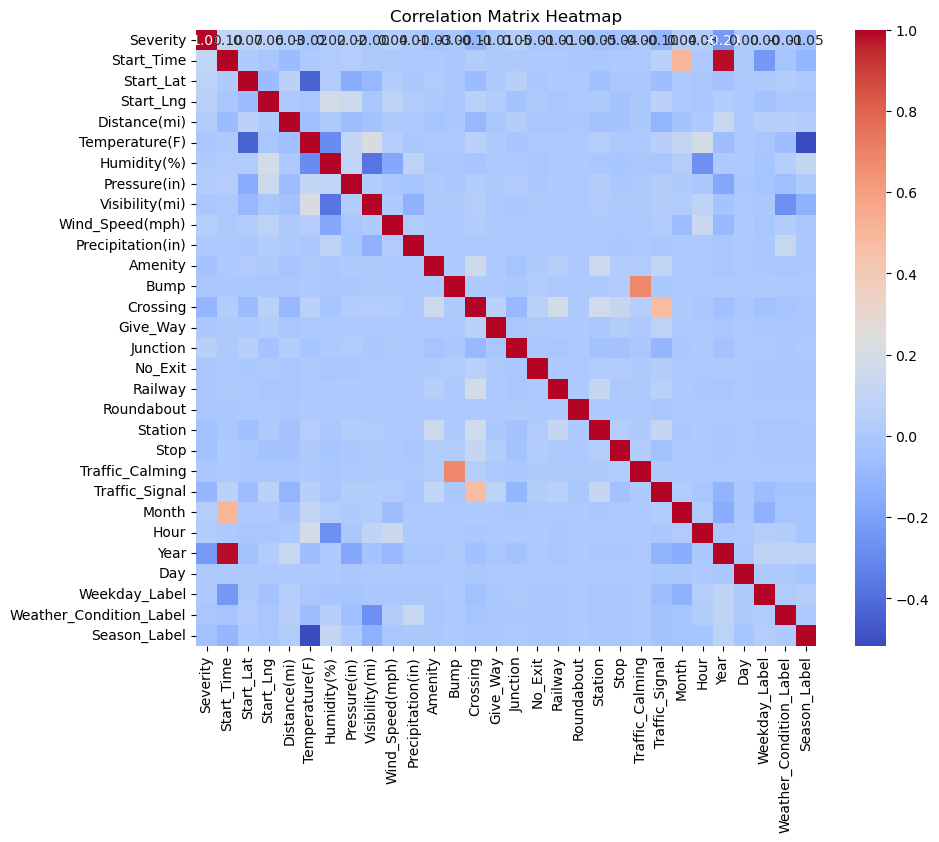

In [84]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
# Plot the correlation matrix as a heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# there is no linear realtion between the features so we will be using non linear ml model to train .


In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns with 0 and 1 values
binary_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal']  # Replace with your actual column names
# Group severity by each binary column and display counts
for col in binary_columns:
    grouped_counts = df.groupby([col, 'Severity']).size().reset_index(name='count')
    print(f"\nCounts of Severity grouped by {col}:")
    print(grouped_counts)



Counts of Severity grouped by Amenity:
   Amenity  Severity    count
0        0         1    16715
1        0         2  1464893
2        0         3   295638
3        0         4    46768
4        1         1      367
5        1         2    21064
6        1         3      937
7        1         4      445

Counts of Severity grouped by Bump:
   Bump  Severity    count
0     0         1    17074
1     0         2  1485222
2     0         3   296486
3     0         4    47206
4     1         1        8
5     1         2      735
6     1         3       89
7     1         4        7

Counts of Severity grouped by Crossing:
   Crossing  Severity    count
0         0         1    12258
1         0         2  1294367
2         0         3   285295
3         0         4    44060
4         1         1     4824
5         1         2   191590
6         1         3    11280
7         1         4     3153

Counts of Severity grouped by Give_Way:
   Give_Way  Severity    count
0         0       

In [86]:
df["Severity"].value_counts() 

Severity
2    1485957
3     296575
4      47213
1      17082
Name: count, dtype: int64

In [87]:
df.columns

Index(['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Month', 'Hour', 'Year',
       'Day', 'Weekday_Label', 'Weather_Condition_Label', 'Season_Label'],
      dtype='object')

#### Results of feature engineering

### Results of datetime feature engineering

### Results of merging weather conditions

# model training

# Using models
I will be using the following models:

RandomForest, NearestNeighbours, AdaBoost.

I'll also be using the ensembler VotingClassifier.

# using smote for oversampling 

In [88]:
!pip  install --upgrade imbalanced-learn


In [89]:
!pip install --upgrade scikit-learn

In [90]:
datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()
cat_cols = df.select_dtypes(include=['category']).columns.tolist()
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()
num_cols = df.select_dtypes(include=['float', 'int']).columns.tolist()
print(num_cols)
print(datetime_cols)
print(cat_cols)
print(bool_cols)


['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Month', 'Hour', 'Year', 'Day', 'Weekday_Label', 'Weather_Condition_Label', 'Season_Label']
['Start_Time']
[]
[]


In [91]:
df = df.dropna()

In [92]:
columns_to_drop = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
                   'Station', 'Stop', 'Traffic_Calming', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Traffic_Signal','Weekday_Label','Season_Label','Day','Start_Time','Year' ]

# Drop the specified columns
df_final = df.drop(columns=columns_to_drop)

# Display the updated DataFrame
df_final.columns
datetime_cols = df_final.select_dtypes(include=['datetime64[ns]']).columns.tolist()
cat_cols = df_final.select_dtypes(include=['category']).columns.tolist()
bool_cols = df_final.select_dtypes(include=['bool']).columns.tolist()
num_cols = df_final.select_dtypes(include=['float', 'int']).columns.tolist()
print(num_cols)
print(datetime_cols)
print(cat_cols)
print(bool_cols)                       

['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Month', 'Hour', 'Weather_Condition_Label']
[]
[]
[]


In [93]:
df_final.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Month', 'Hour',
       'Weather_Condition_Label'],
      dtype='object')

In [94]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'df_final' is your DataFrame and 'Severity' is the target column
target = 'Severity'  # Replace with your actual target column name

# Splitting the dataset
y = df_final[target]
X = df_final.drop(columns=target, axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)





## random forest with grid search cv hyperparameter tuning 

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Define parameter grid with reduced search space
param_grid = {
    "classifier__n_estimators": [50, 100],  # Reduced options
    "classifier__max_depth": [10, 20]      # Reduced options
}

# Class weights for imbalanced data
class_weights = {
    1: 96.44,
    2: 1.27,
    3: 5.59,
    4: 39.34
}

# Define the pipeline
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42, class_weight=class_weights))
])

# Reduce cross-validation folds
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)  # Reduced folds

# Use RandomizedSearchCV for faster search
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=4,  # Test only 5 random combinations
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)

# Fit RandomizedSearchCV to training data
random_search.fit(X_train, y_train)

# Best model from RandomizedSearchCV
rf_best_model = random_search.best_estimator_

# Predictions on the test set
rf_y_pred = rf_best_model.predict(X_test)

# Print best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate performance
accuracy = accuracy_score(y_test, rf_y_pred)
precision = precision_score(y_test, rf_y_pred, average='weighted')
recall = recall_score(y_test, rf_y_pred, average='weighted')
f1 = f1_score(y_test, rf_y_pred, average='weighted')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, rf_y_pred))


Best Parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 20}
Test Accuracy: 0.7146
Precision: 0.8052
Recall: 0.7146
F1-Score: 0.7472

Classification Report:
               precision    recall  f1-score   support

           1       0.13      0.70      0.22      4179
           2       0.91      0.74      0.81    326244
           3       0.48      0.65      0.55     74035
           4       0.18      0.47      0.26     10682

    accuracy                           0.71    415140
   macro avg       0.43      0.64      0.46    415140
weighted avg       0.81      0.71      0.75    415140



In [96]:
importances = rf_best_model.named_steps['classifier'].feature_importances_
sorted(zip(importances, feature_names), reverse=True)


NameError: name 'feature_names' is not defined

## XG boost with random search cv 


In [ ]:
!pip install xgboost


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [18:09:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.7191
Precision: 0.7934
Recall: 0.7191
F1-Score: 0.7491
AUC-ROC: 0.7934

Classification Report:
               precision    recall  f1-score   support

           1       0.11      0.71      0.19      4179
           2       0.89      0.77      0.82    326244
           3       0.50      0.55      0.52     74035
           4       0.18      0.45      0.26     10682

    accuracy                           0.72    415140
   macro avg       0.42      0.62      0.45    415140
weighted avg       0.79      0.72      0.75    415140



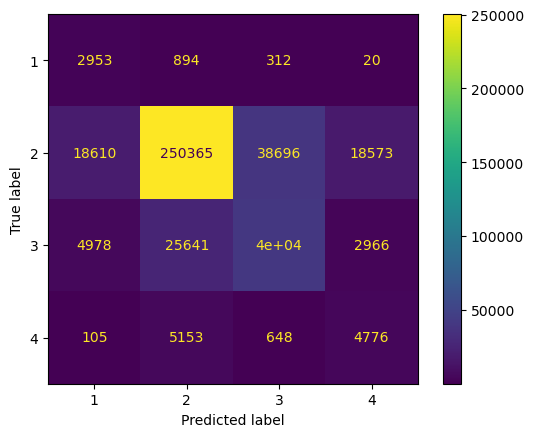

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import numpy as np

# Step 1: Remap target labels to start from 0
class_mapping = {1: 0, 2: 1, 3: 2, 4: 3}  # Original -> Mapped
inverse_mapping = {v: k for k, v in class_mapping.items()}  # Mapped -> Original

# Apply mapping to y_train and y_test
y_train_mapped = y_train.map(class_mapping)
y_test_mapped = y_test.map(class_mapping)

# Step 2: Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train_mapped)

# Step 3: Define numeric and categorical features
numeric_features = ['Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 
                    'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Month', 'Hour']
categorical_features = ['Weather_Condition_Label']

# Step 4: Define preprocessing for numeric features (normalization)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features)
    ],
    remainder='passthrough'  # Pass categorical features through as-is
)

# Step 5: Define the pipeline with preprocessing and XGBoost
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        use_label_encoder=False,
        n_estimators=300,
        max_depth=10,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=1.0
    ))
])

# Step 6: Stratified cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Step 7: Fit the model on the SMOTE-resampled training data
pipeline.fit(X_train_smote, y_train_smote)

# Step 8: Make predictions on the test set (class labels)
xgb_y_pred_mapped = pipeline.predict(X_test)

# Remap predictions back to original labels
xgb_y_pred = np.array([inverse_mapping[label] for label in xgb_y_pred_mapped])

# Step 9: Predictions as probabilities (for ROC-AUC)
xgb_y_pred_proba = pipeline.predict_proba(X_test)

# Step 10: Evaluate performance
accuracy = accuracy_score(y_test, xgb_y_pred)
precision = precision_score(y_test, xgb_y_pred, average='weighted')
recall = recall_score(y_test, xgb_y_pred, average='weighted')
f1 = f1_score(y_test, xgb_y_pred, average='weighted')
roc_auc = roc_auc_score(y_test_mapped, xgb_y_pred_proba, multi_class='ovr', average='weighted')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, xgb_y_pred))

# Confusion matrix visualization
ConfusionMatrixDisplay.from_predictions(y_test, xgb_y_pred)


In [104]:
import joblib
joblib.dump(xgb_best_model, 'xgb_best_model.joblib')

['xgb_best_model.joblib']

## XGboost with class weights 


In [101]:
!pip install lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.8 MB/s eta 0:00:00


### Light gbm 

Class Counts:
 Severity
2    978358
3    222525
4     31633
1     12902
Name: count, dtype: int64
Computed Scale Pos Weights:
 {2: 1.2729675640205325, 3: 5.5967554207392425, 4: 39.370846900388834, 1: 96.52906526119982}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1416
[LightGBM] [Info] Number of data points in the train set: 1245418, number of used features: 10
[LightGBM] [Info] Start training from score -4.569844
[LightGBM] [Info] Start training from score -0.241351
[LightGBM] [Info] Start training from score -1.722187
[LightGBM] [Info] Start training from score -3.673026
Best Parameters: {'classifier__subsample': 0.85, 'classifier__scale_pos_weight': 5.5967554207392425, 'classifier__num_leaves': 70, 'classifier__n_estimators': 350, 'classifier__max_depth': 10, 'classifier__lear

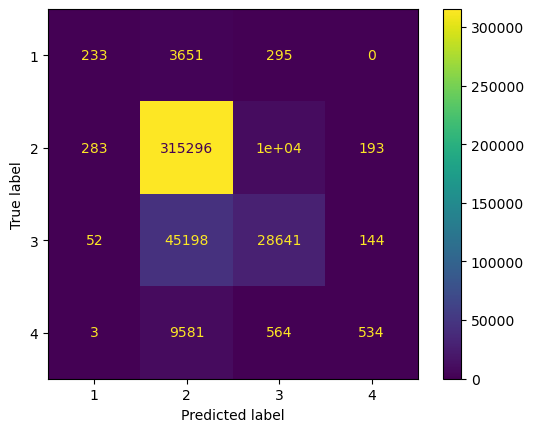

In [98]:
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

# Step 1: Calculate scale_pos_weight dynamically based on class distribution
class_counts = y_train.value_counts()
total_samples = len(y_train)
scale_pos_weights = {class_label: total_samples / count for class_label, count in class_counts.items()}

print("Class Counts:\n", class_counts)
print("Computed Scale Pos Weights:\n", scale_pos_weights)

# Step 2: Define numeric and categorical features
numeric_features = ['Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 
                    'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Month', 'Hour']
categorical_features = ['Weather_Condition_Label']

# Step 3: Define preprocessing for numeric features (normalization)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features)
    ],
    remainder='passthrough'  # Pass Weather_Condition_Label through as-is
)

# Step 4: Define parameter distributions for fine-tuning
param_distributions = {
    "classifier__n_estimators": [250, 300, 350],
    "classifier__max_depth": [8, 10, 12],
    "classifier__learning_rate": [0.04, 0.05, 0.06],
    "classifier__num_leaves": [31, 50, 70],
    "classifier__subsample": [0.75, 0.8, 0.85],
    "classifier__colsample_bytree": [0.9, 1.0],
    "classifier__scale_pos_weight": [scale_pos_weights[class_label] for class_label in sorted(scale_pos_weights.keys())]
}

# Step 5: Define the pipeline with preprocessing
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42))
])

# Step 6: Stratified cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Step 7: Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=10,  # Test 10 random combinations
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42
)

# Step 8: Fit RandomizedSearchCV to training data
random_search.fit(X_train, y_train)

# Best model from RandomizedSearchCV
lgbm_best_model = random_search.best_estimator_

# Step 9: Make predictions on the test set (class labels)
lgbm_y_pred = lgbm_best_model.predict(X_test)

# Step 10: Predictions as probabilities (for ROC-AUC)
lgbm_y_pred_proba = lgbm_best_model.predict_proba(X_test)

# Step 11: Evaluate performance
accuracy = accuracy_score(y_test, lgbm_y_pred)
precision = precision_score(y_test, lgbm_y_pred, average='weighted')
recall = recall_score(y_test, lgbm_y_pred, average='weighted')
f1 = f1_score(y_test, lgbm_y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, lgbm_y_pred_proba, multi_class='ovr', average='weighted')

print("Best Parameters:", random_search.best_params_)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, lgbm_y_pred))

# Confusion matrix visualization
ConfusionMatrixDisplay.from_predictions(y_test, lgbm_y_pred)


## light gbm with smote 

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
from lightgbm import LGBMClassifier

# Step 1: Define numeric and categorical features
numeric_features = ['Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 
                    'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Month', 'Hour']
categorical_features = ['Weather_Condition_Label']

# Step 2: Define preprocessing for numeric features (normalization)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features)
    ],
    remainder='passthrough'  # Pass Weather_Condition_Label through as-is
)

# Step 3: Define parameter distributions for fine-tuning
param_distributions = {
    "classifier__n_estimators": [250, 300, 350],
    "classifier__max_depth": [8, 10, 12],
    "classifier__learning_rate": [0.04, 0.05, 0.06],
    "classifier__num_leaves": [31, 50, 70],
    "classifier__subsample": [0.75, 0.8, 0.85],
    "classifier__colsample_bytree": [0.9, 1.0]
}

# Step 4: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Step 5: Define the pipeline with preprocessing
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42))
])

# Step 6: Stratified cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Step 7: Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=10,  # Test 10 random combinations
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42
)

# Step 8: Fit RandomizedSearchCV to the SMOTE-transformed data
random_search.fit(X_smote, y_smote)

# Best model from RandomizedSearchCV
lgbm_best_model = random_search.best_estimator_

# Step 9: Make predictions on the test set (class labels)
lgbm_y_pred = lgbm_best_model.predict(X_test)

# Step 10: Predictions as probabilities (for ROC-AUC)
lgbm_y_pred_proba = lgbm_best_model.predict_proba(X_test)

# Step 11: Evaluate performance
accuracy = accuracy_score(y_test, lgbm_y_pred)
precision = precision_score(y_test, lgbm_y_pred, average='weighted')
recall = recall_score(y_test, lgbm_y_pred, average='weighted')
f1 = f1_score(y_test, lgbm_y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, lgbm_y_pred_proba, multi_class='ovr', average='weighted')

print("Best Parameters:", random_search.best_params_)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, lgbm_y_pred))

# Confusion matrix visualization
ConfusionMatrixDisplay.from_predictions(y_test, lgbm_y_pred)
